In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
from pacmap import PaCMAP
from trimap import TRIMAP
import warnings
# Hide warning messages
warnings.filterwarnings('ignore')

# Dataset generation

## Functions that generates different figures

In [8]:
# sphere
def generate_n_dimensional_sphere(num_dimensions, num_points, radius=1):
    
    # Generate normal distributed points.
    points = np.random.randn(num_dimensions, num_points)

    # Normalize the points so that they are on the surface of the sphere.
    points /= np.linalg.norm(points, axis=0)
    
    points *= radius
    return points.T

In [9]:
# ball
def generate_n_dimensional_ball(num_dimensions, num_points, radius=1):

    # Generate points on the surface of the sphere.
    points = np.random.randn(num_dimensions, num_points)
    points /= np.linalg.norm(points, axis=0)

    # Generate a random scaling factor for each point.
    scales = np.random.rand(num_points) ** (1 / num_dimensions)

    # Scale the points by the scaling factors so they are inside the sphere.
    points *= scales * radius

    return points.T

In [10]:
# torus
def generate_n_dimensional_torus(n_dimensions, n_points, R=2, r=1):
    """
    Creates an n-dimensional torus.
    
    Parameters:
    n_dimensions : int
        The number of dimensions for the torus. Must be greater than or equal to 2.
    n_points : int
        The number of points.
    R : float
        The distance from the center of the tube to the center of the torus.
    r : float
        The radius of the tube (distance from the center of the tube to the torus surface).
        
    Returns:
    numpy.ndarray
        The n-dimensional points of the torus.
    """
    
    assert n_dimensions >= 2, "Number of dimensions must be greater than or equal to 2."

    # generate n_points random angles for each dimension
    angles = np.random.uniform(0, 2*np.pi, (n_points, n_dimensions))

    # calculate the n-dimensional points on the torus
    coordinates = []
    for i in range(n_dimensions):
        if i == 0:
            coordinate = (R + r * np.cos(angles[:, 1])) * np.cos(angles[:, 0])
        elif i == 1:
            coordinate = (R + r * np.cos(angles[:, 1])) * np.sin(angles[:, 0])
        else:
            coordinate = r * np.sin(angles[:, i])
        coordinates.append(coordinate)

    return np.array(coordinates).T


In [11]:
# ball in sphere in sphere
def generate_ball_in_sphere_in_sphere(num_dimensions, num_points, radii=[1, 50, 100]):
    
    ball_1 = generate_n_dimensional_ball(num_dimensions, num_points, radii[0])
    sphere_1 = generate_n_dimensional_sphere(num_dimensions, num_points, radii[1])
    sphere_2 = generate_n_dimensional_sphere(num_dimensions, num_points, radii[2])
    
    return np.concatenate((ball_1, sphere_1, sphere_2))

In [12]:
# torus in sphere
def generate_torus_in_sphere(num_dimensions, num_points, radii=[5, 50, 100]):
    
    torus = generate_n_dimensional_torus(num_dimensions, num_points, radii[1], radii[0])
    sphere = generate_n_dimensional_sphere(num_dimensions, num_points, radii[2])
    
    return np.concatenate((torus, sphere))

## Functions to visualise figures

In [13]:
# visualisation of 3d figures
# one color
def visualize_3d_figure(points, title='3 dimensional points'):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])

    # Set the same scale for all axes
    max_range = np.array([points[:, 0].max()-points[:, 0].min(), points[:, 1].max()-points[:, 1].min(), points[:, 2].max()-points[:, 2].min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(points[:, 0].max()+points[:, 0].min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(points[:, 1].max()+points[:, 1].min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(points[:, 2].max()+points[:, 2].min())

    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()


In [14]:
# visualisation of 3d figures in figures
# two color
def visualize_3d_figure_in_figure(points, title='3 dimensional points'):
    n = int(points.shape[0] / 3)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(points[:n, 0], points[:n, 1], points[:n, 2])
    ax.scatter3D(points[-n:, 0], points[-n:, 1], points[-n:, 2], color = 'pink', alpha = 0.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
    plt.show()

In [15]:
# visualisation of 3d figure in figure in figure
# three colors
def visualize_3d_figure_in_figure_in_figure(points, title='3 dimensional points'):
    n = int(points.shape[0] / 3)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(points[:n, 0], points[:n, 1], points[:n, 2])
    ax.scatter3D(points[n:-n, 0], points[n:-n, 1], points[n:-n, 2], color = 'green', alpha = 0.3)
    ax.scatter3D(points[-n:, 0], points[-n:, 1], points[-n:, 2], color = 'pink', alpha = 0.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
    plt.show()


### Generation of dataset 1, ball in sphere in sphere

In [16]:
# generate dataset with 3 dimensions
dataset_3d_1000p = generate_ball_in_sphere_in_sphere(3, 1000)
dataset_3d_10000p = generate_ball_in_sphere_in_sphere(3, 10000)
dataset_3d_100000p = generate_ball_in_sphere_in_sphere(3, 100000)

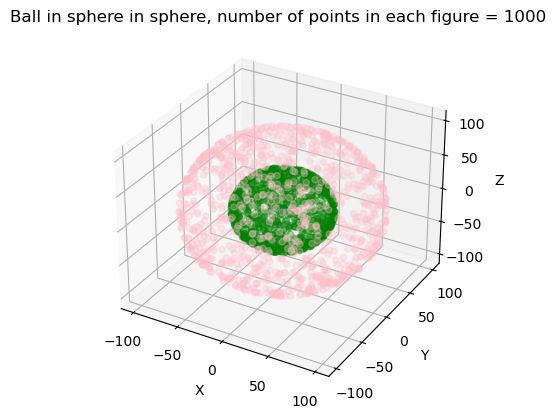

In [17]:
visualize_3d_figure_in_figure_in_figure(dataset_3d_1000p, title='Ball in sphere in sphere, number of points in each figure = 1000')

In [18]:
# generate datasets with 5 dimensions
dataset_5d_1000p = generate_ball_in_sphere_in_sphere(5, 1000)
dataset_5d_10000p = generate_ball_in_sphere_in_sphere(5, 10000)
dataset_5d_100000p = generate_ball_in_sphere_in_sphere(5, 100000)

In [19]:
# generate datasets with 10 dimensions 
dataset_10d_1000p = generate_ball_in_sphere_in_sphere(10, 1000)
dataset_10d_10000p = generate_ball_in_sphere_in_sphere(10, 10000)
dataset_10d_100000p = generate_ball_in_sphere_in_sphere(10, 100000)

In [20]:
# generate datasets with 15 dimensions 
dataset_15d_1000p = generate_ball_in_sphere_in_sphere(15, 1000)
dataset_15d_10000p = generate_ball_in_sphere_in_sphere(15, 10000)
dataset_15d_100000p = generate_ball_in_sphere_in_sphere(15, 100000)

## Generation of dataset 2, torus in sphere

In [21]:
# generate dataset with 3 dimensions
dataset_3d_1000p_2 = generate_torus_in_sphere(3, 1000)
dataset_3d_10000p_2 = generate_torus_in_sphere(3, 10000)
dataset_3d_100000p_2 = generate_torus_in_sphere(3, 100000)

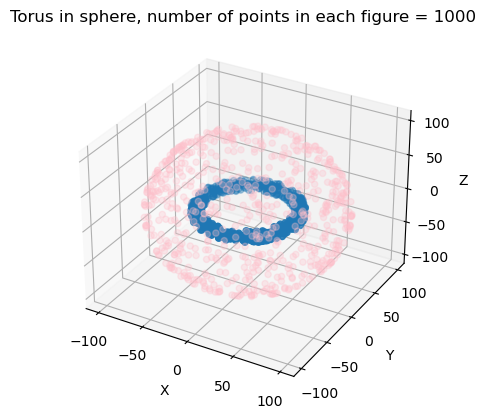

In [22]:
visualize_3d_figure_in_figure(dataset_3d_1000p_2, title='Torus in sphere, number of points in each figure = 1000')

In [23]:
# generate datasets with 5 dimensions
dataset_5d_1000p_2 = generate_torus_in_sphere(5, 1000)
dataset_5d_10000p_2 = generate_torus_in_sphere(5, 10000)
dataset_5d_100000p_2 = generate_torus_in_sphere(5, 100000)

In [24]:
# generate datasets with 10 dimensions 
dataset_10d_1000p_2 = generate_torus_in_sphere(10, 1000)
dataset_10d_10000p_2 = generate_torus_in_sphere(10, 10000)
dataset_10d_100000p_2 = generate_torus_in_sphere(10, 100000)

In [25]:
# generate datasets with 15 dimensions 
dataset_15d_1000p_2 = generate_torus_in_sphere(15, 1000)
dataset_15d_10000p_2 = generate_torus_in_sphere(15, 10000)
dataset_15d_100000p_2 = generate_torus_in_sphere(15, 100000)

# Functions of algorithms that reduces dimensionality

In [26]:
def tsne_visualisation(points, title='TSNE'):
    
    # Apply t-SNE for dimensionality reduction
    tsne = TSNE()
    reduced_points = tsne.fit_transform(points)
    
    # Plot the reduced points in 2D
    plt.scatter(reduced_points[:, 0], reduced_points[:, 1])
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title(title)

In [27]:
def umap_visualisation(points, title = 'UMAP'):
    
    # Apply t-SNE for dimensionality reduction
    umap = UMAP()
    reduced_points = umap.fit_transform(points)

    # Plot the reduced points in 2D
    plt.scatter(reduced_points[:, 0], reduced_points[:, 1])
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.title(title)
    

In [28]:
def trimap_visualisation(points, title = 'PaCMAP'):
    
    # Apply TriMAP for dimensionality reduction
    trimap = TRIMAP()
    reduced_points = trimap.fit_transform(points)
    
    # Plot the reduced points in 2D
    plt.scatter(reduced_points[:, 0], reduced_points[:, 1])
    plt.xlabel('TriMAP Dimension 1')
    plt.ylabel('TriMAP Dimension 2')
    plt.title(title)

In [29]:
def pacmap_visualisation(points, title = 'PaCMAP'):
    
    # Apply PaCMAP for dimensionality reduction
    pacmap = PaCMAP()
    reduced_points = pacmap.fit_transform(points)
    
    # Plot the reduced points in 2D
    plt.scatter(reduced_points[:, 0], reduced_points[:, 1])
    plt.xlabel('PaCMAP Dimension 1')
    plt.ylabel('PaCMAP Dimension 2')
    plt.title(title)

In [30]:
def ivhd_visualisation(points, title = 'IVHD'):
    pass

# Dataset 0, dimensionality reduction on ball sphere and torus

Redukcja wymiarów na podstawowych figurach

## Sphere

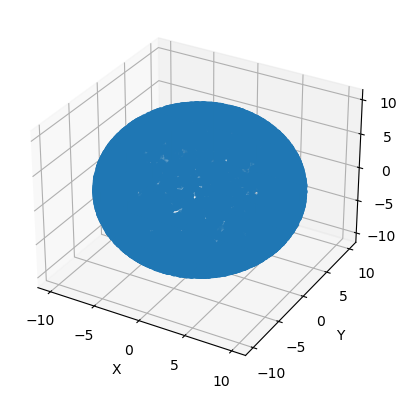

In [93]:
sphere = generate_n_dimensional_sphere(3, 10000, 10)
visualize_3d_figure(sphere, title = '3 dimensional sphere, number of points = 1000')

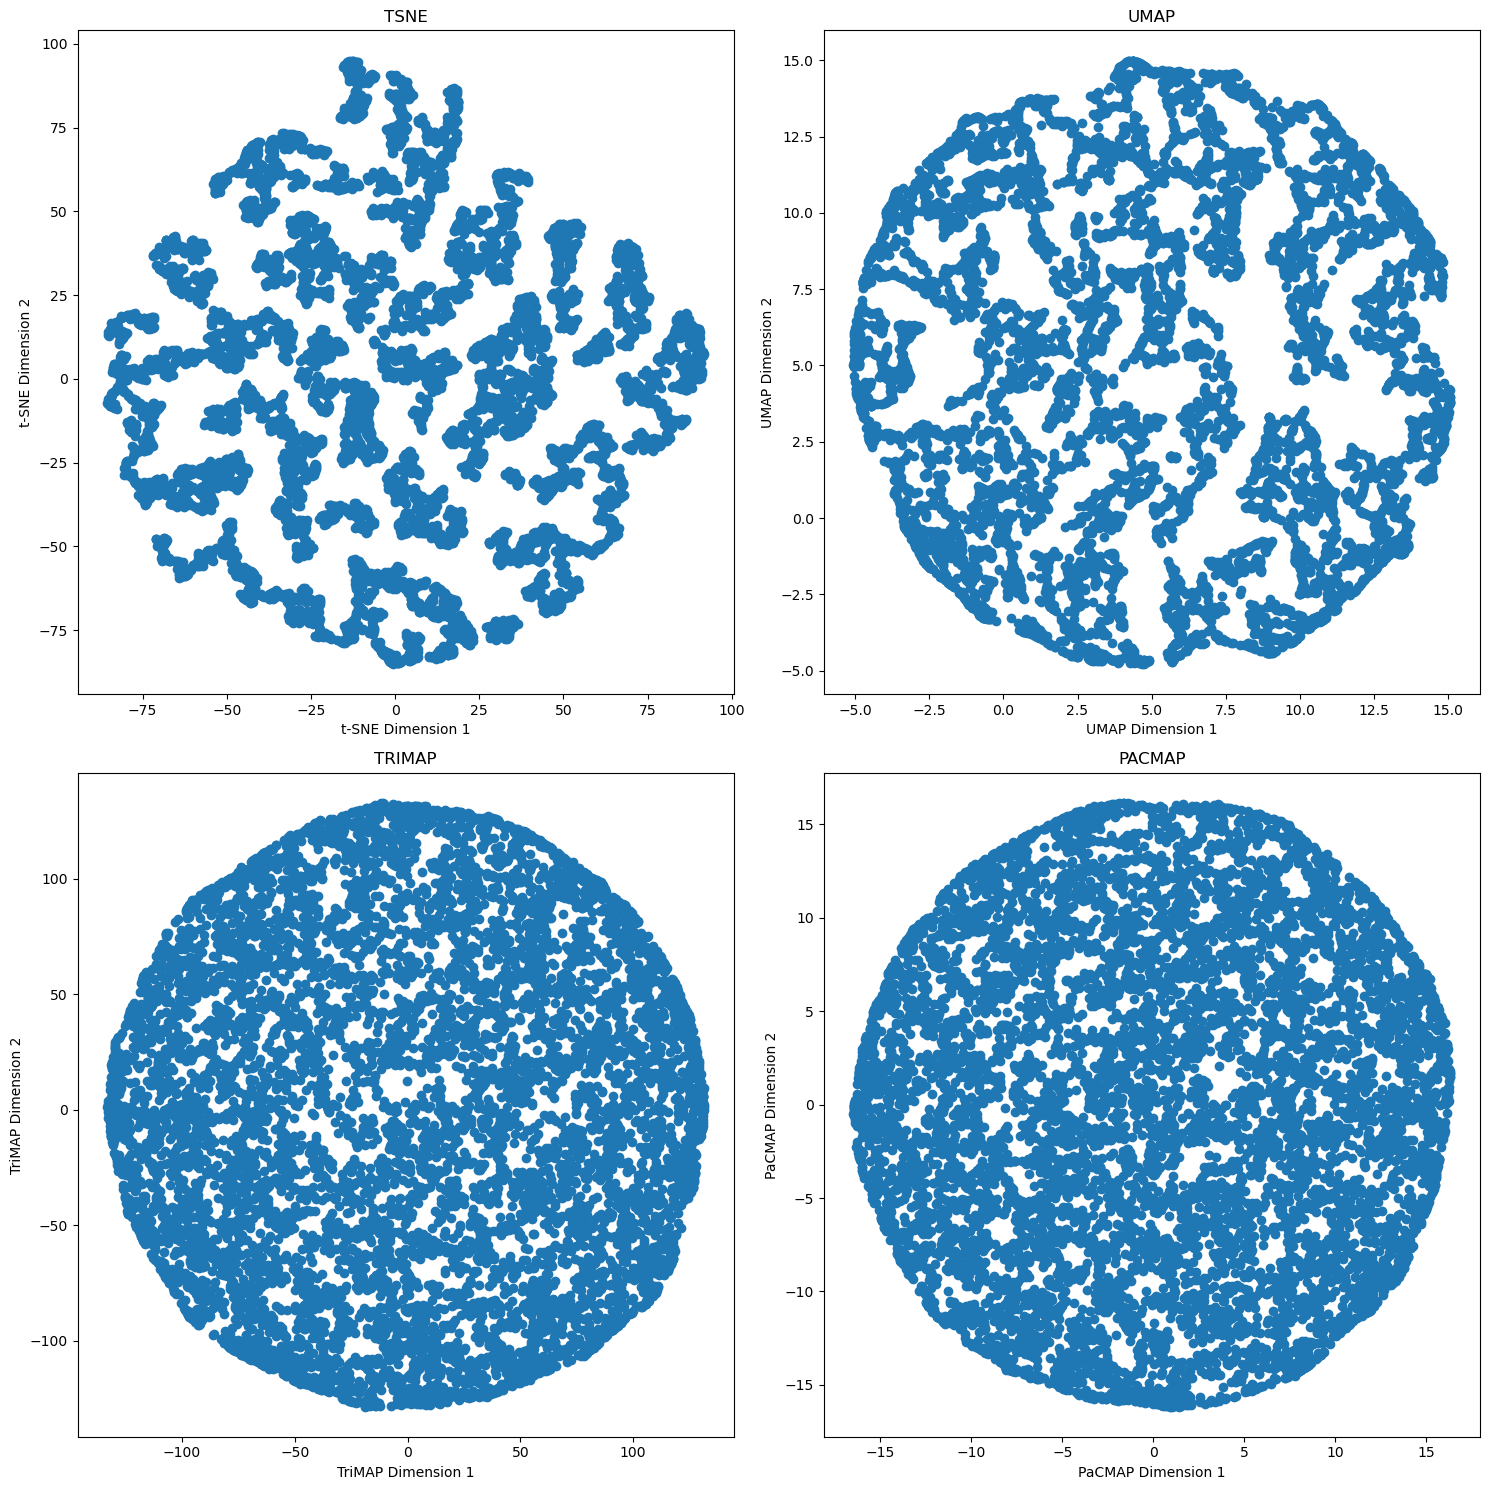

In [94]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
tsne_visualisation(sphere, title='TSNE')
plt.subplot(2, 2, 2)
umap_visualisation(sphere, title='UMAP')
plt.subplot(2, 2, 3)
trimap_visualisation(sphere, title='TRIMAP')
plt.subplot(2, 2, 4)
pacmap_visualisation(sphere, title='PACMAP')

plt.tight_layout()
plt.show()

## Ball

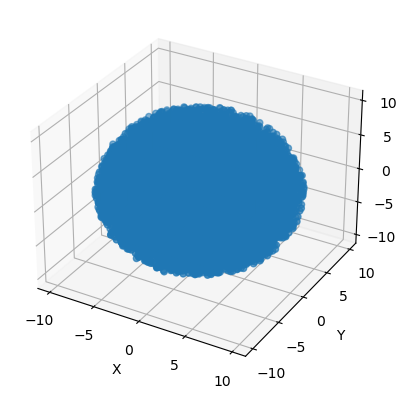

In [95]:
ball = generate_n_dimensional_ball(3, 10000, 10)
visualize_3d_figure(ball, title = '3 dimensional ball, number of points = 1000')

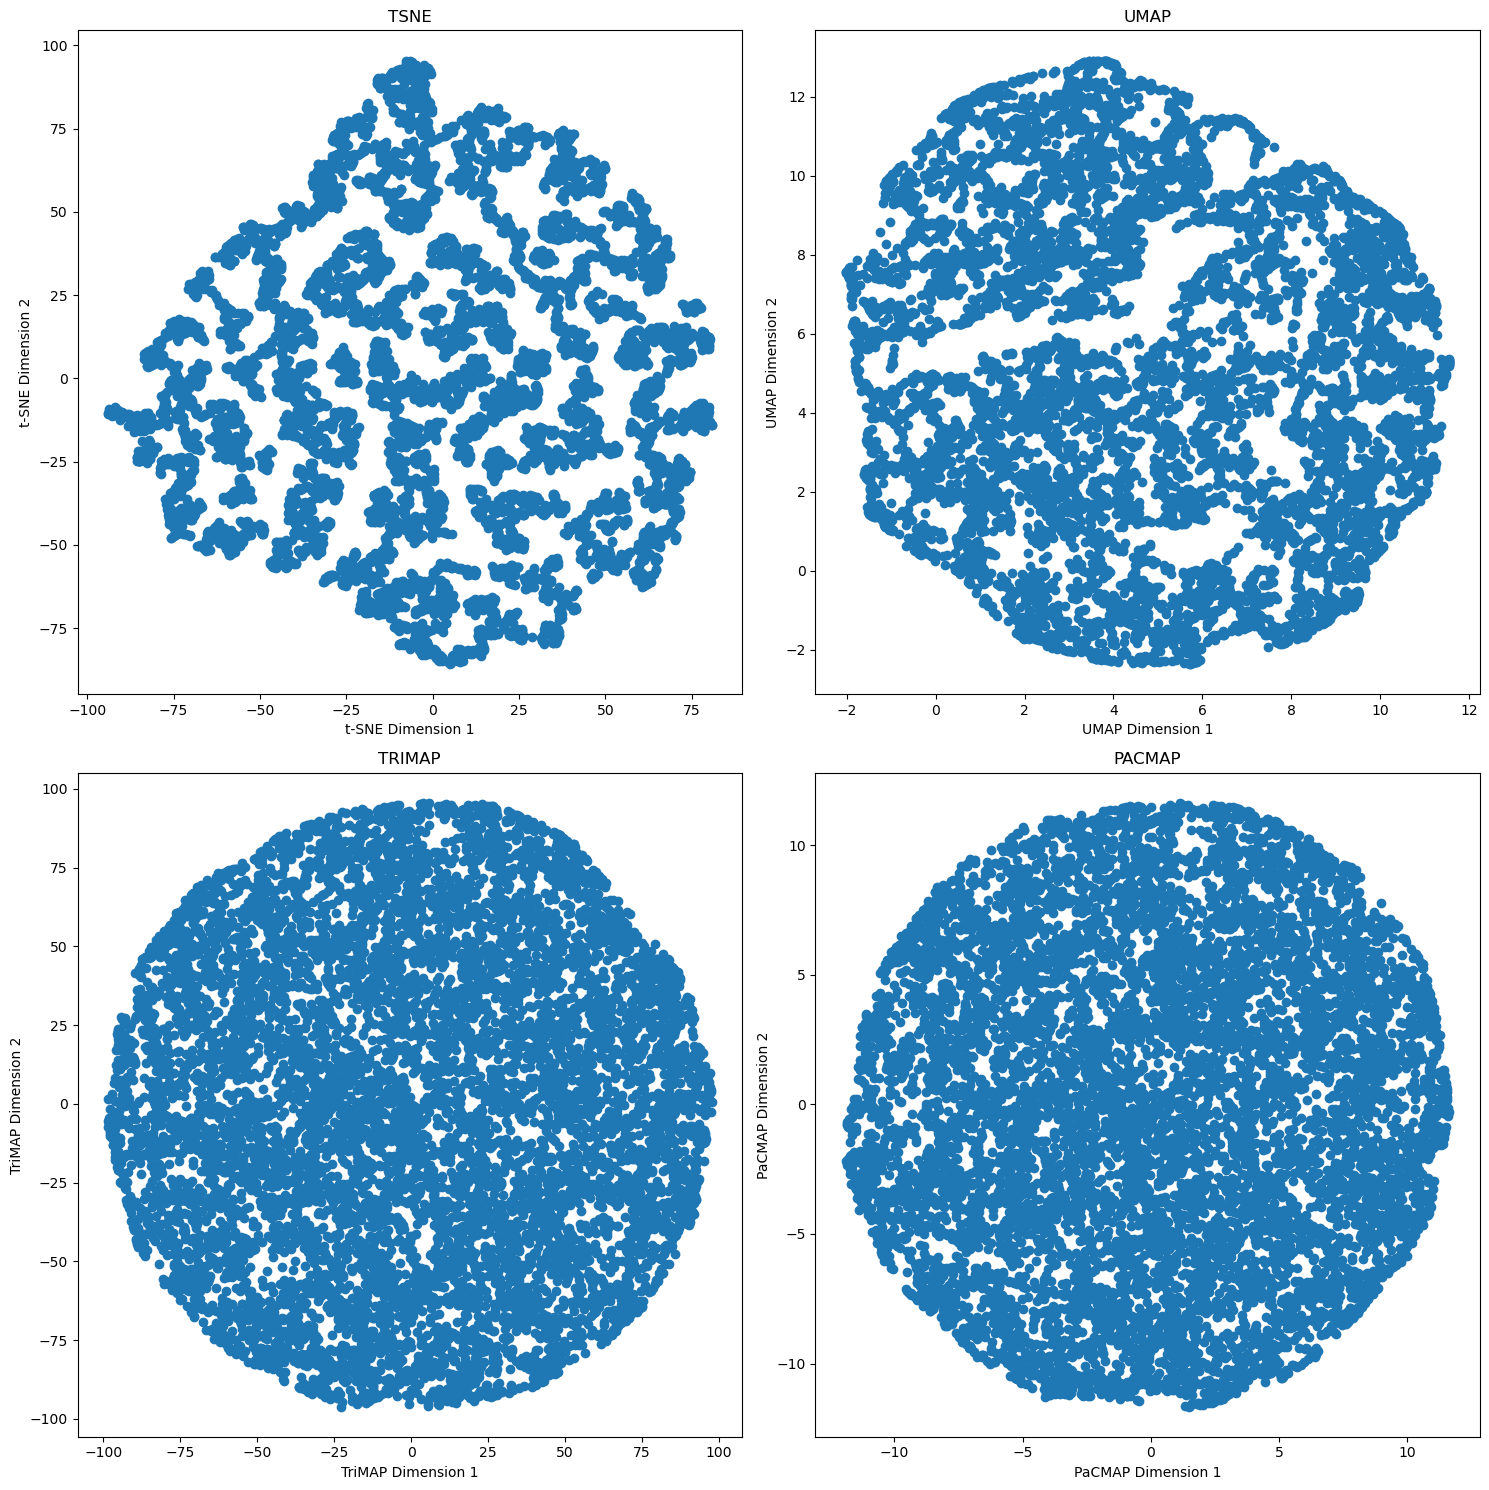

In [96]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
tsne_visualisation(ball, title='TSNE')
plt.subplot(2, 2, 2)
umap_visualisation(ball, title='UMAP')
plt.subplot(2, 2, 3)
trimap_visualisation(ball, title='TRIMAP')
plt.subplot(2, 2, 4)
pacmap_visualisation(ball, title='PACMAP')

plt.tight_layout()
plt.show()

Miedzy kulą a sfera nie ma jakiejs duzej roznicy w wizualizacji

## Torus

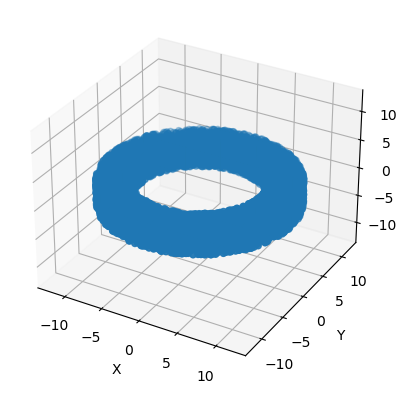

In [97]:
torus = generate_n_dimensional_torus(3, 10000, 10, 2)
visualize_3d_figure(torus, title = '3 dimensional torus, number of points = 1000')

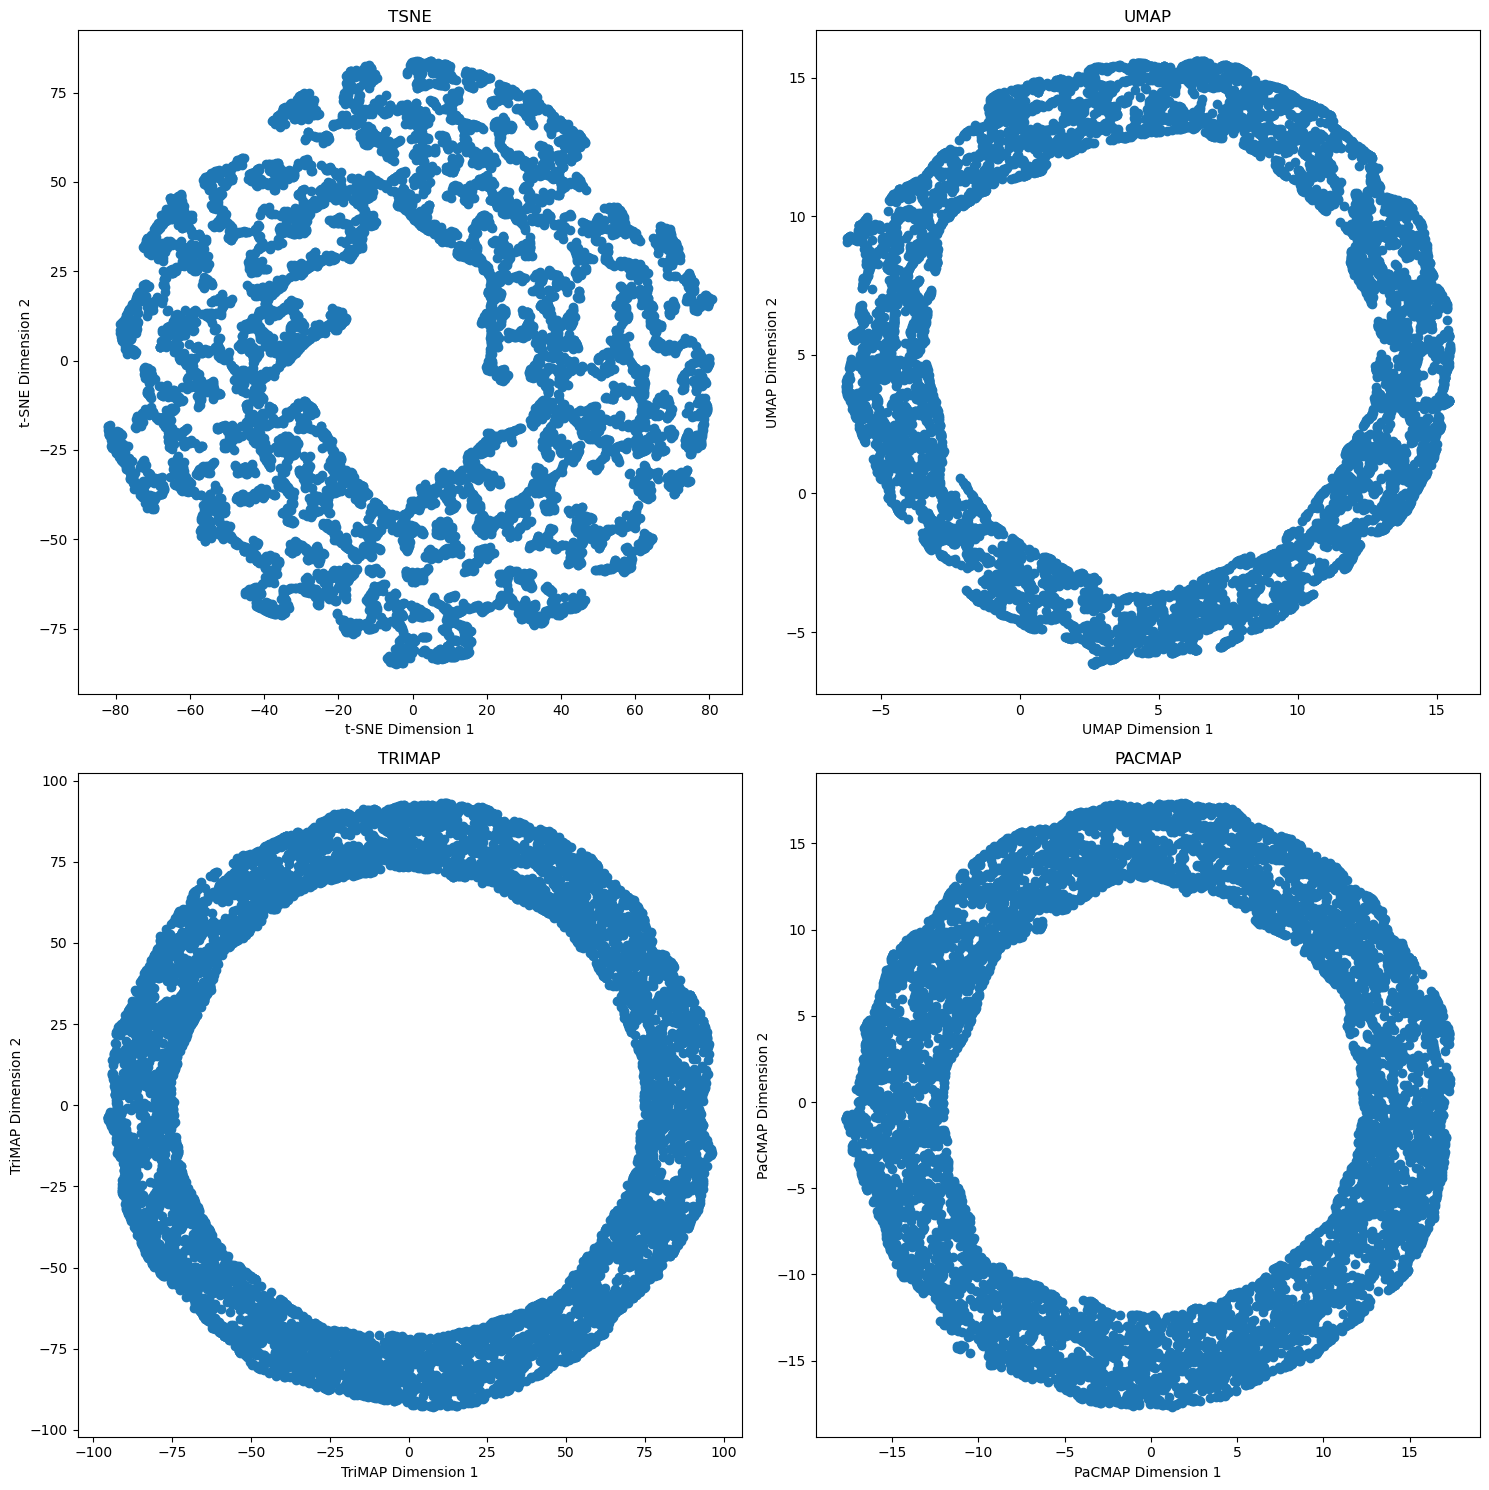

In [98]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
tsne_visualisation(torus, title='TSNE')
plt.subplot(2, 2, 2)
umap_visualisation(torus, title='UMAP')
plt.subplot(2, 2, 3)
trimap_visualisation(torus, title='TRIMAP')
plt.subplot(2, 2, 4)
pacmap_visualisation(torus, title='PACMAP')

plt.tight_layout()
plt.show()

# Dataset 1 - Ball in sphere in sphere

## Number of points in whole dataset = 3000, 1000 points in each figure

### TSNE

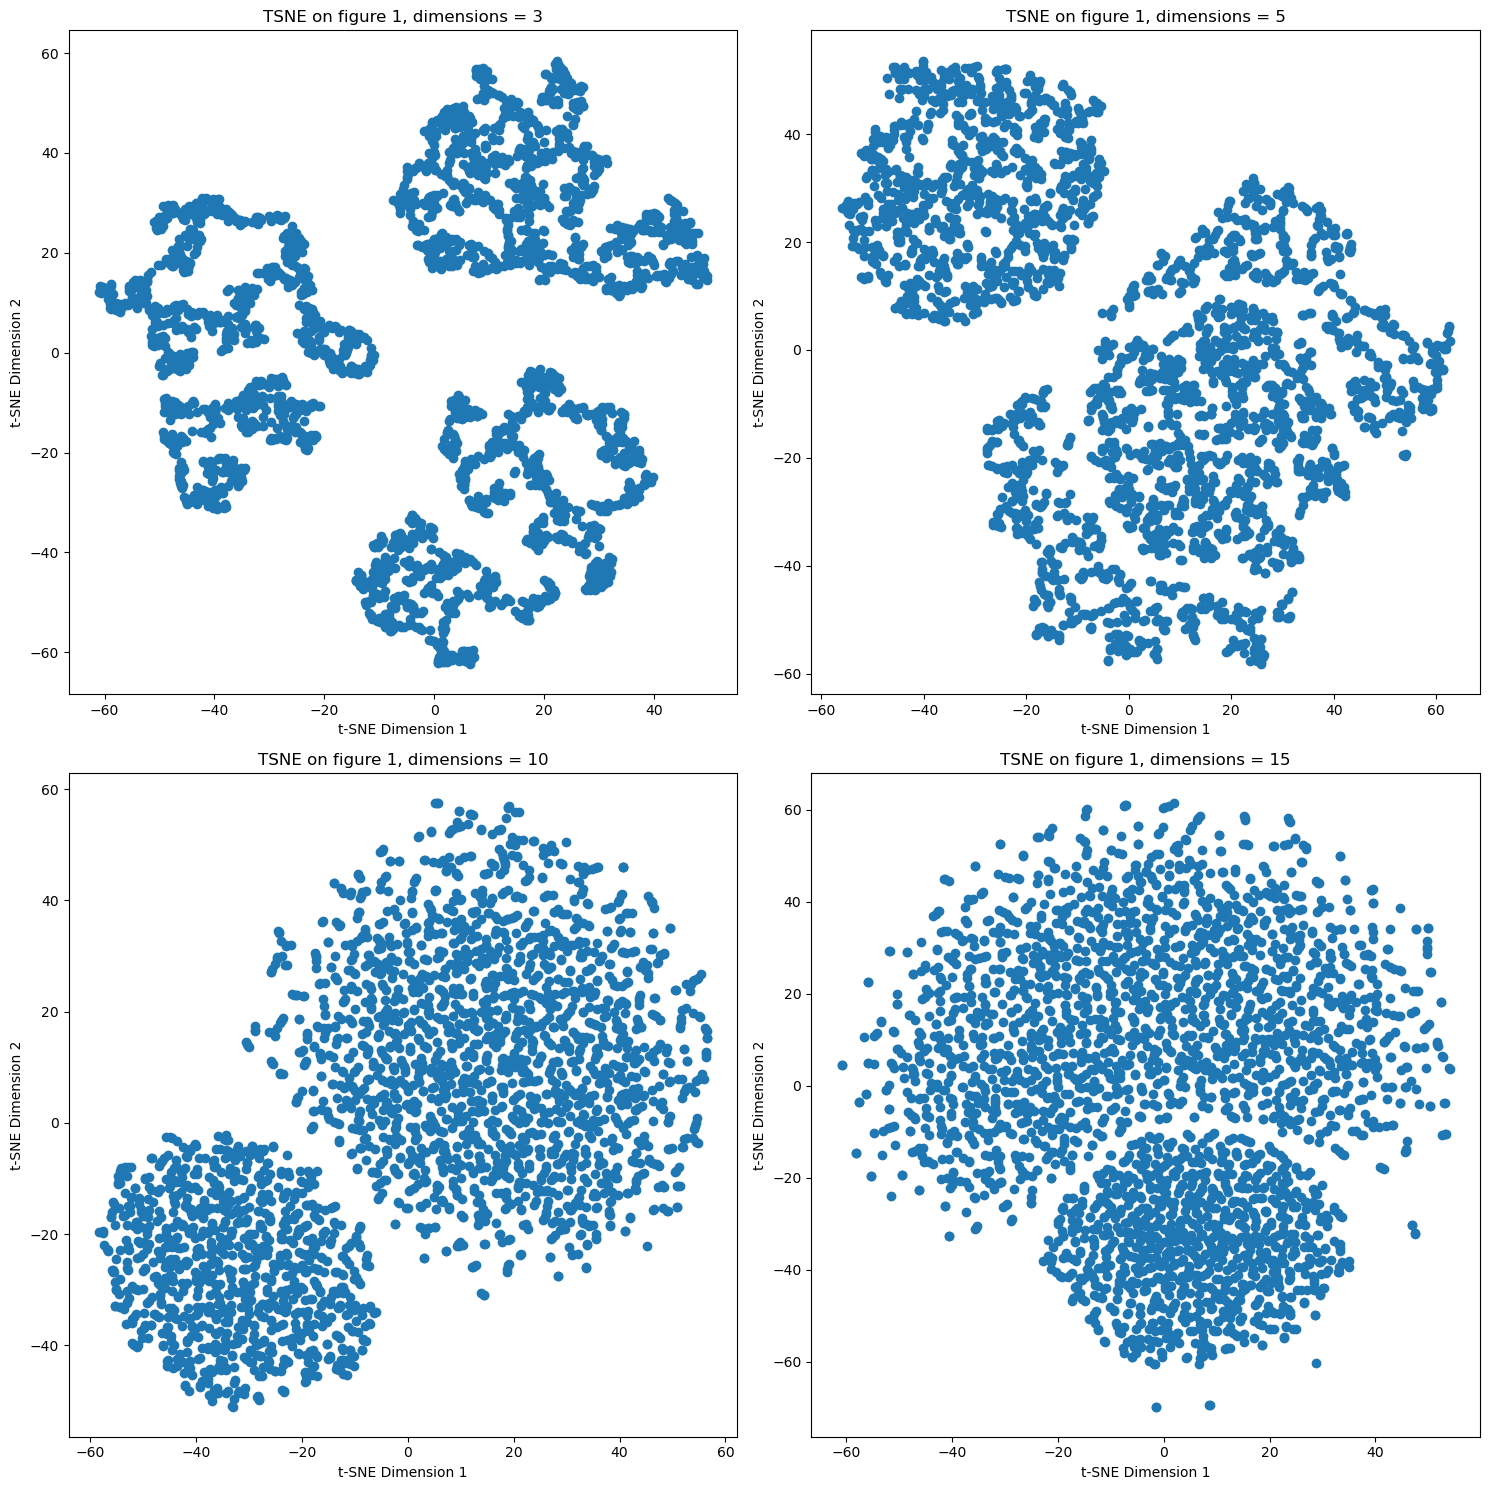

In [21]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
tsne_visualisation(dataset_3d_1000p, title='TSNE on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
tsne_visualisation(dataset_5d_1000p, title='TSNE on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
tsne_visualisation(dataset_10d_1000p, title='TSNE on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
tsne_visualisation(dataset_15d_1000p, title='TSNE on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

Wniosek: <br/>
+ Dla 3 wymiarów dobrze rozdzielił klastry lokalnie, im więcej wymiarów tym większy szum


### UMAP

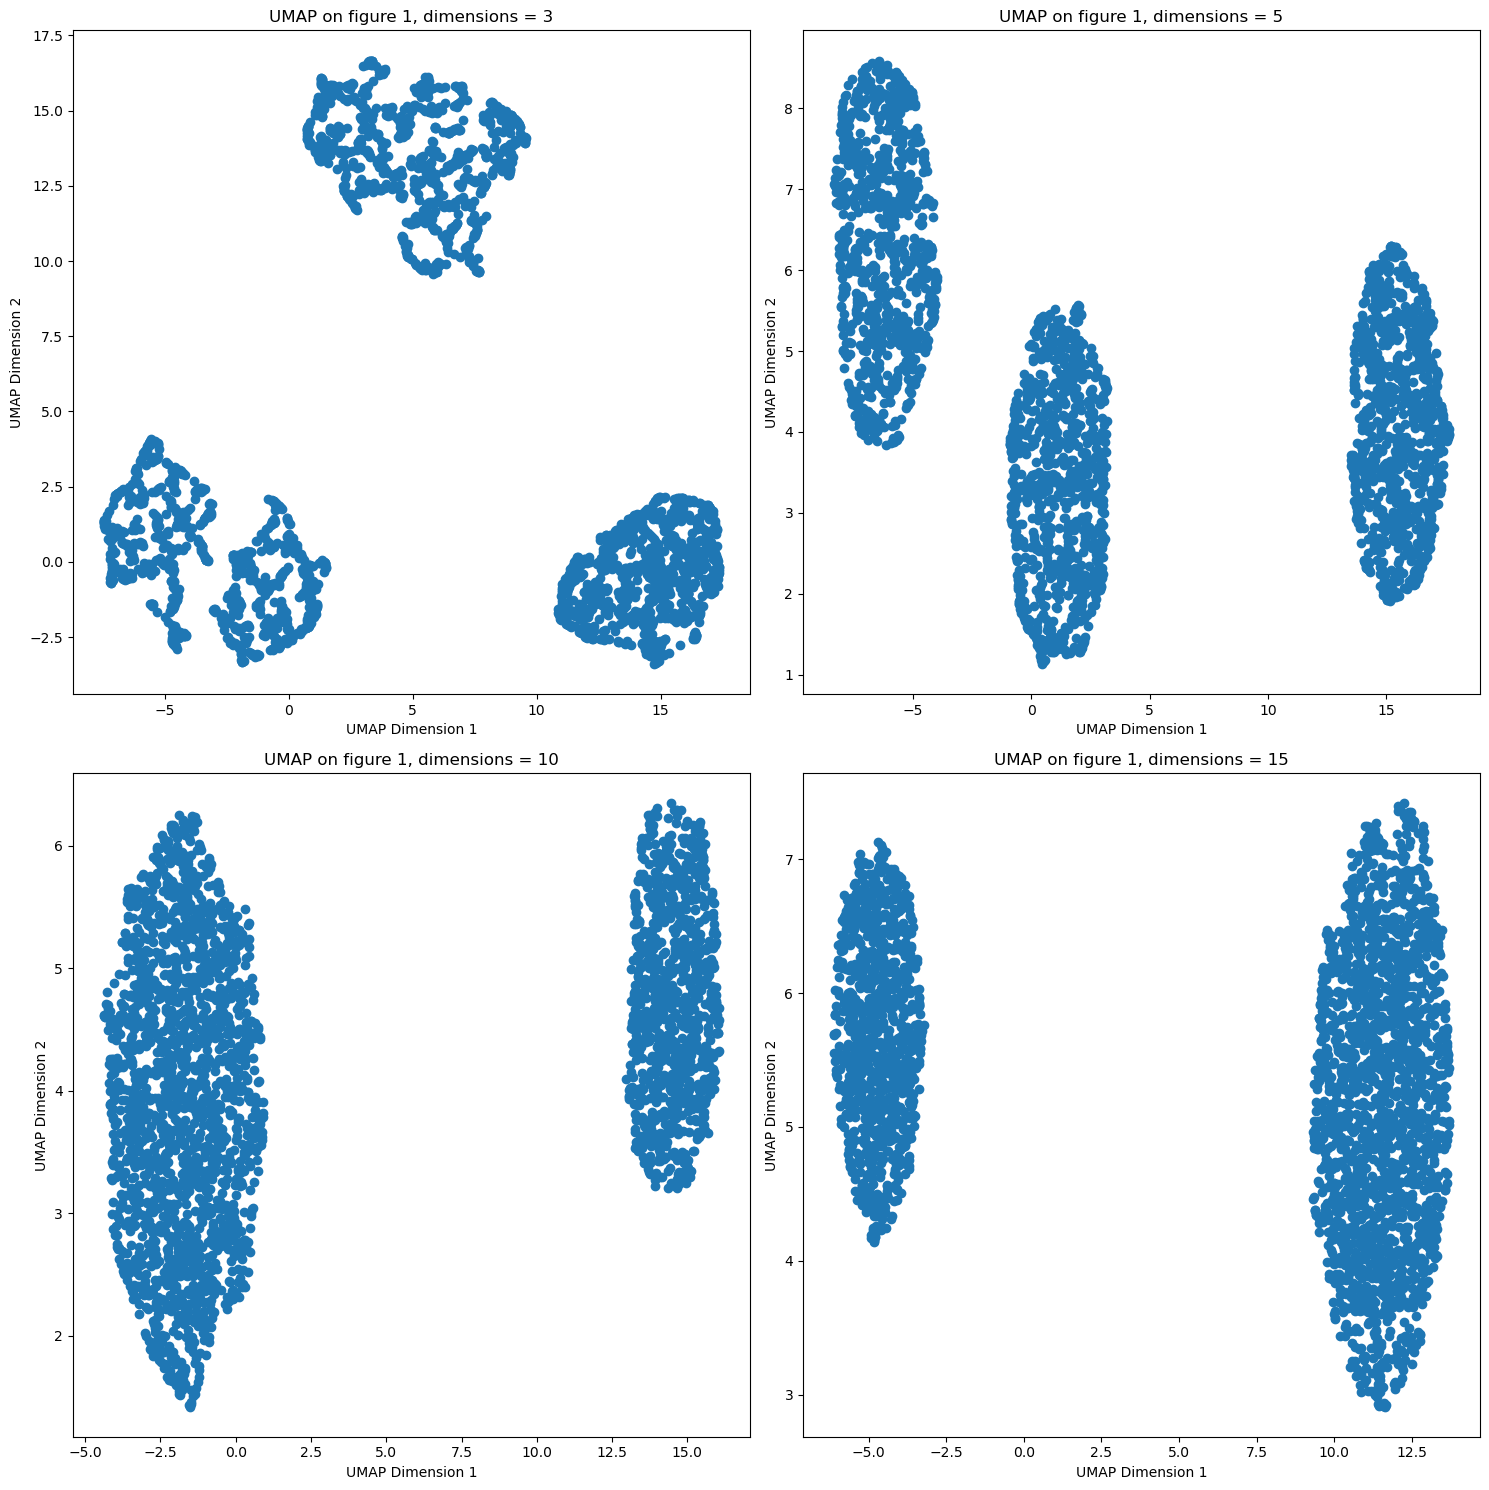

In [22]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
umap_visualisation(dataset_3d_1000p, title='UMAP on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
umap_visualisation(dataset_5d_1000p, title='UMAP on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
umap_visualisation(dataset_10d_1000p, title='UMAP on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
umap_visualisation(dataset_15d_1000p, title='UMAP on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Lepiej niż tsne bo dla 5 wymiarów też dobrze rozdziela lokalnie
+ Od 10 wymiarów tworzy dwa klastry, czy można to jakos sprawdzić które klastry łączy ze sobą?


### TriMAP

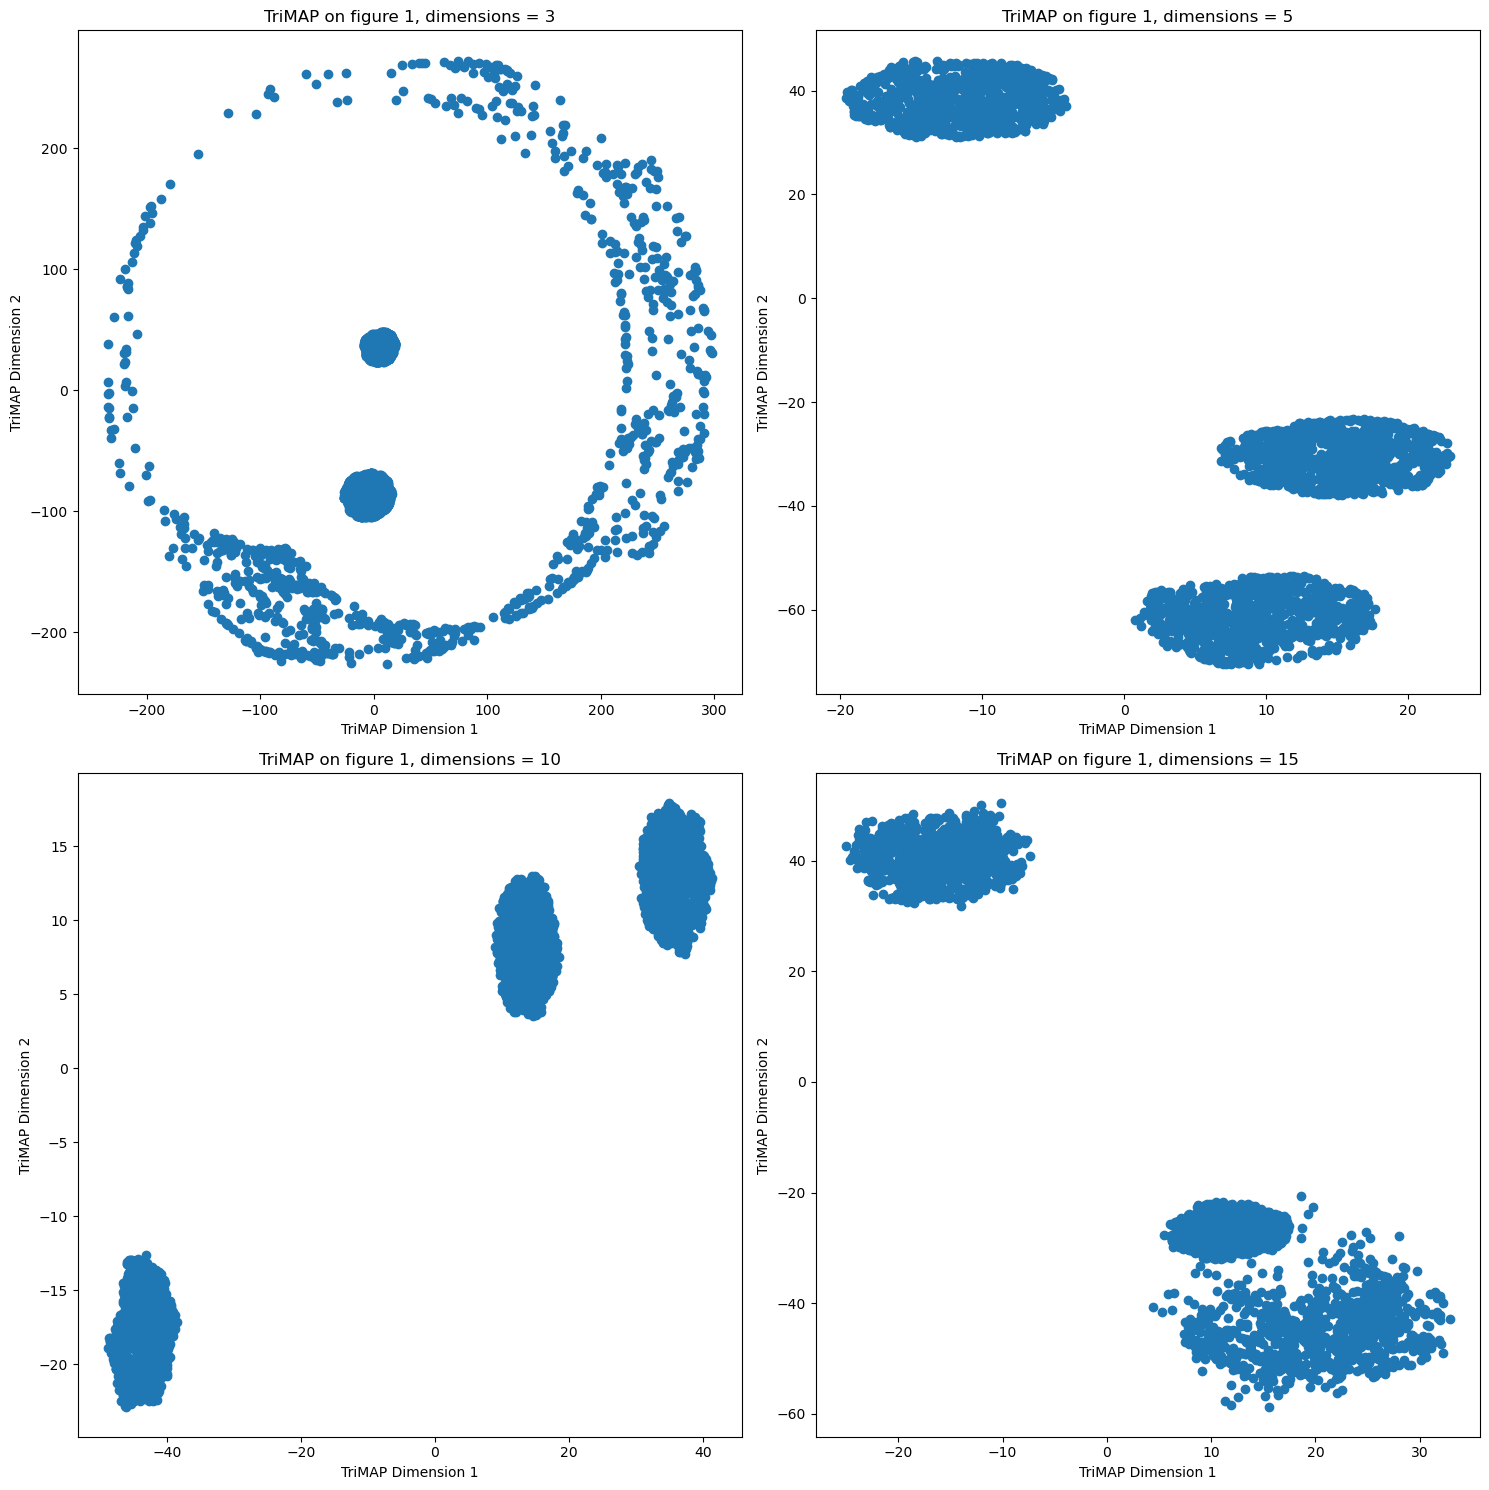

In [23]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
trimap_visualisation(dataset_3d_1000p, title='TriMAP on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
trimap_visualisation(dataset_5d_1000p, title='TriMAP on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
trimap_visualisation(dataset_10d_1000p, title='TriMAP on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
trimap_visualisation(dataset_15d_1000p, title='TriMAP on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Dla 3 wymiarów dobrze rozdzielił klastry zarówno lokalnie jak i globalnie
+ Dla 5 i 10 wymiarów dobrze rozdziela lokalnie, ale globalnie nie
+ Jako jedyny do tej pory w miare dobrze poradził sobie z 15 wymiarami

### PaCMAP

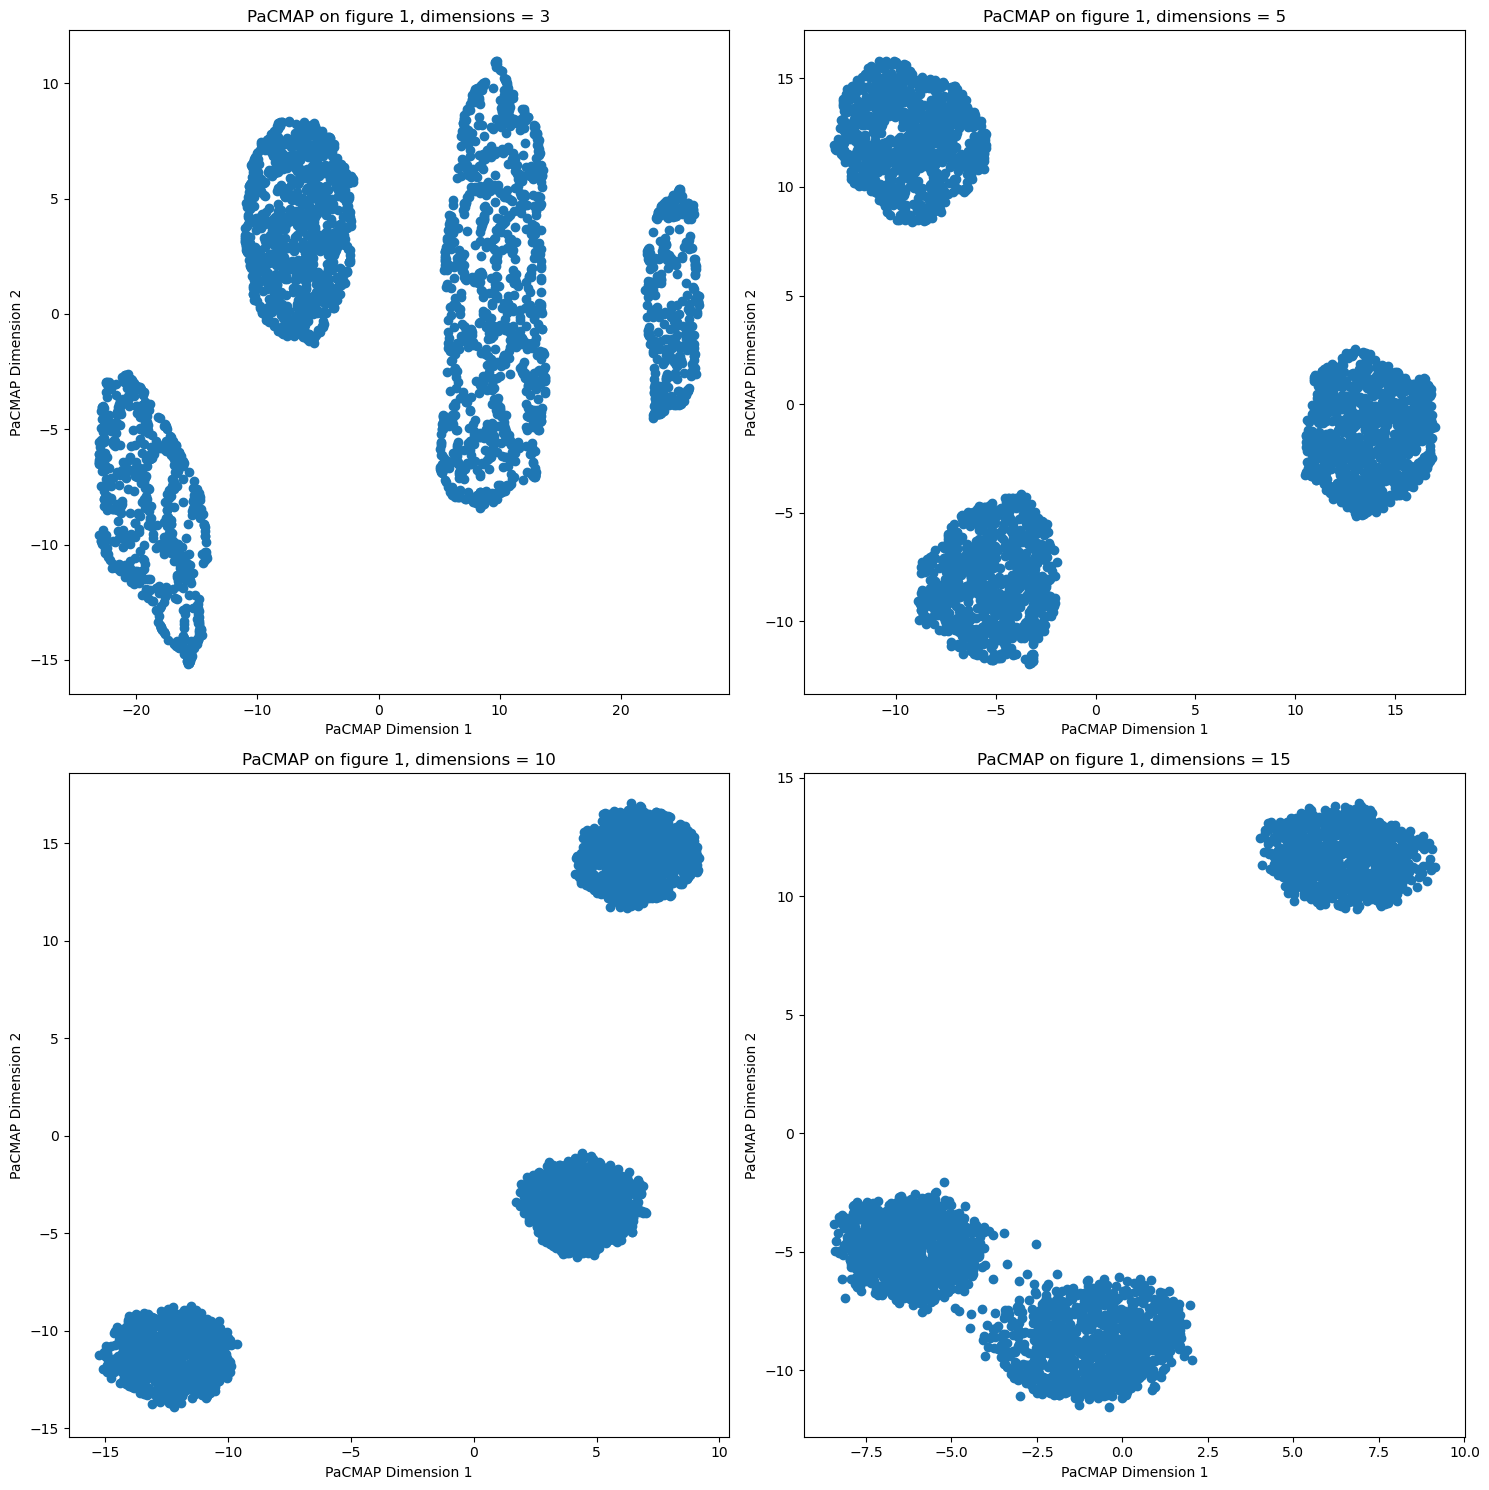

In [31]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
pacmap_visualisation(dataset_3d_1000p, title='PaCMAP on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
pacmap_visualisation(dataset_5d_1000p, title='PaCMAP on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
pacmap_visualisation(dataset_10d_1000p, title='PaCMAP on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
pacmap_visualisation(dataset_15d_1000p, title='PaCMAP on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Dla 3 wymiarów pokazał 4 klastry, wtf
+ Nawet dla 15 wymiarów sobie dobrze radzi z lokalnym podziałem

## Number of points in whole dataset = 30 000, 10 000 in each figure

### TSNE

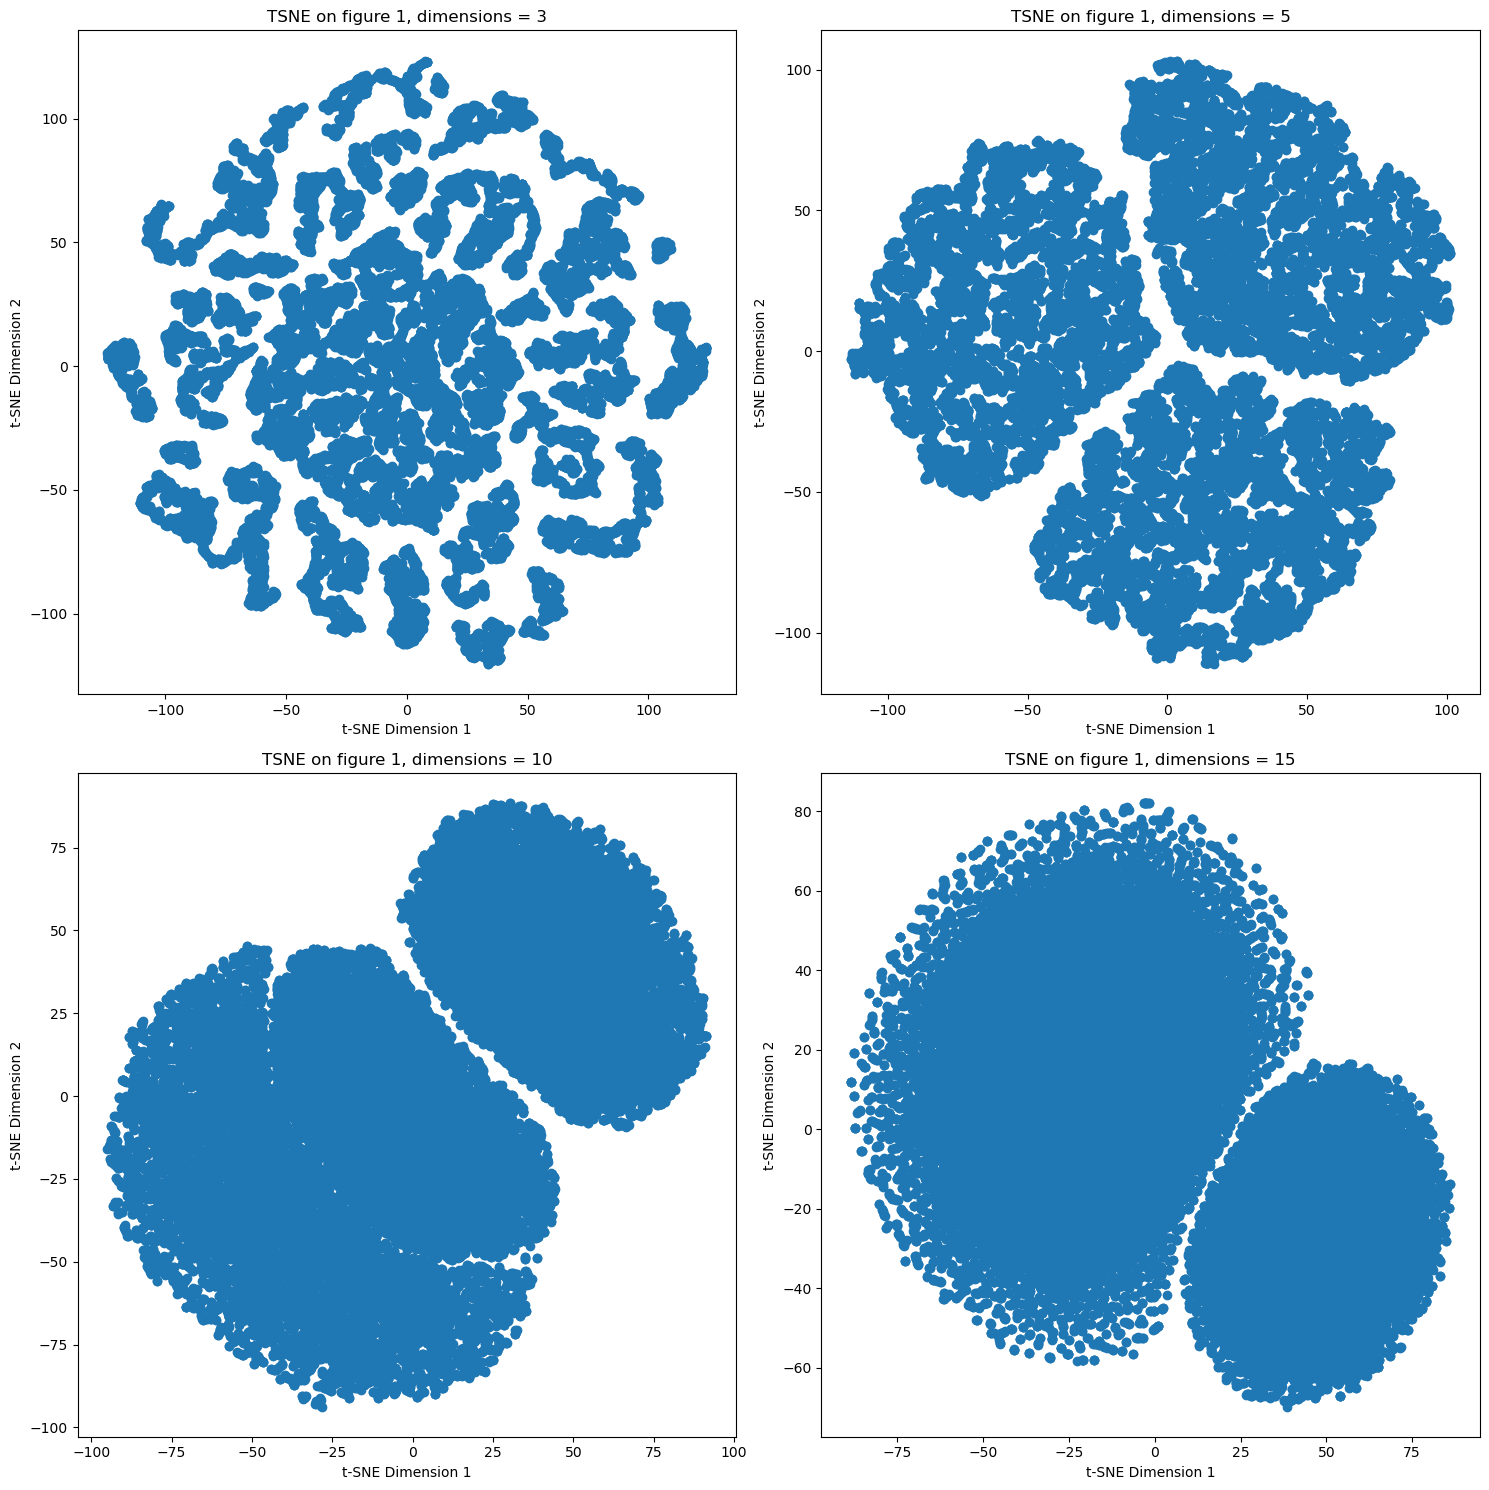

In [25]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
tsne_visualisation(dataset_3d_10000p, title='TSNE on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
tsne_visualisation(dataset_5d_10000p, title='TSNE on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
tsne_visualisation(dataset_10d_10000p, title='TSNE on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
tsne_visualisation(dataset_15d_10000p, title='TSNE on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Dla 3 wymairów to chyba wyglada lepiej przy 10000 niz przy 1000p

### UMAP

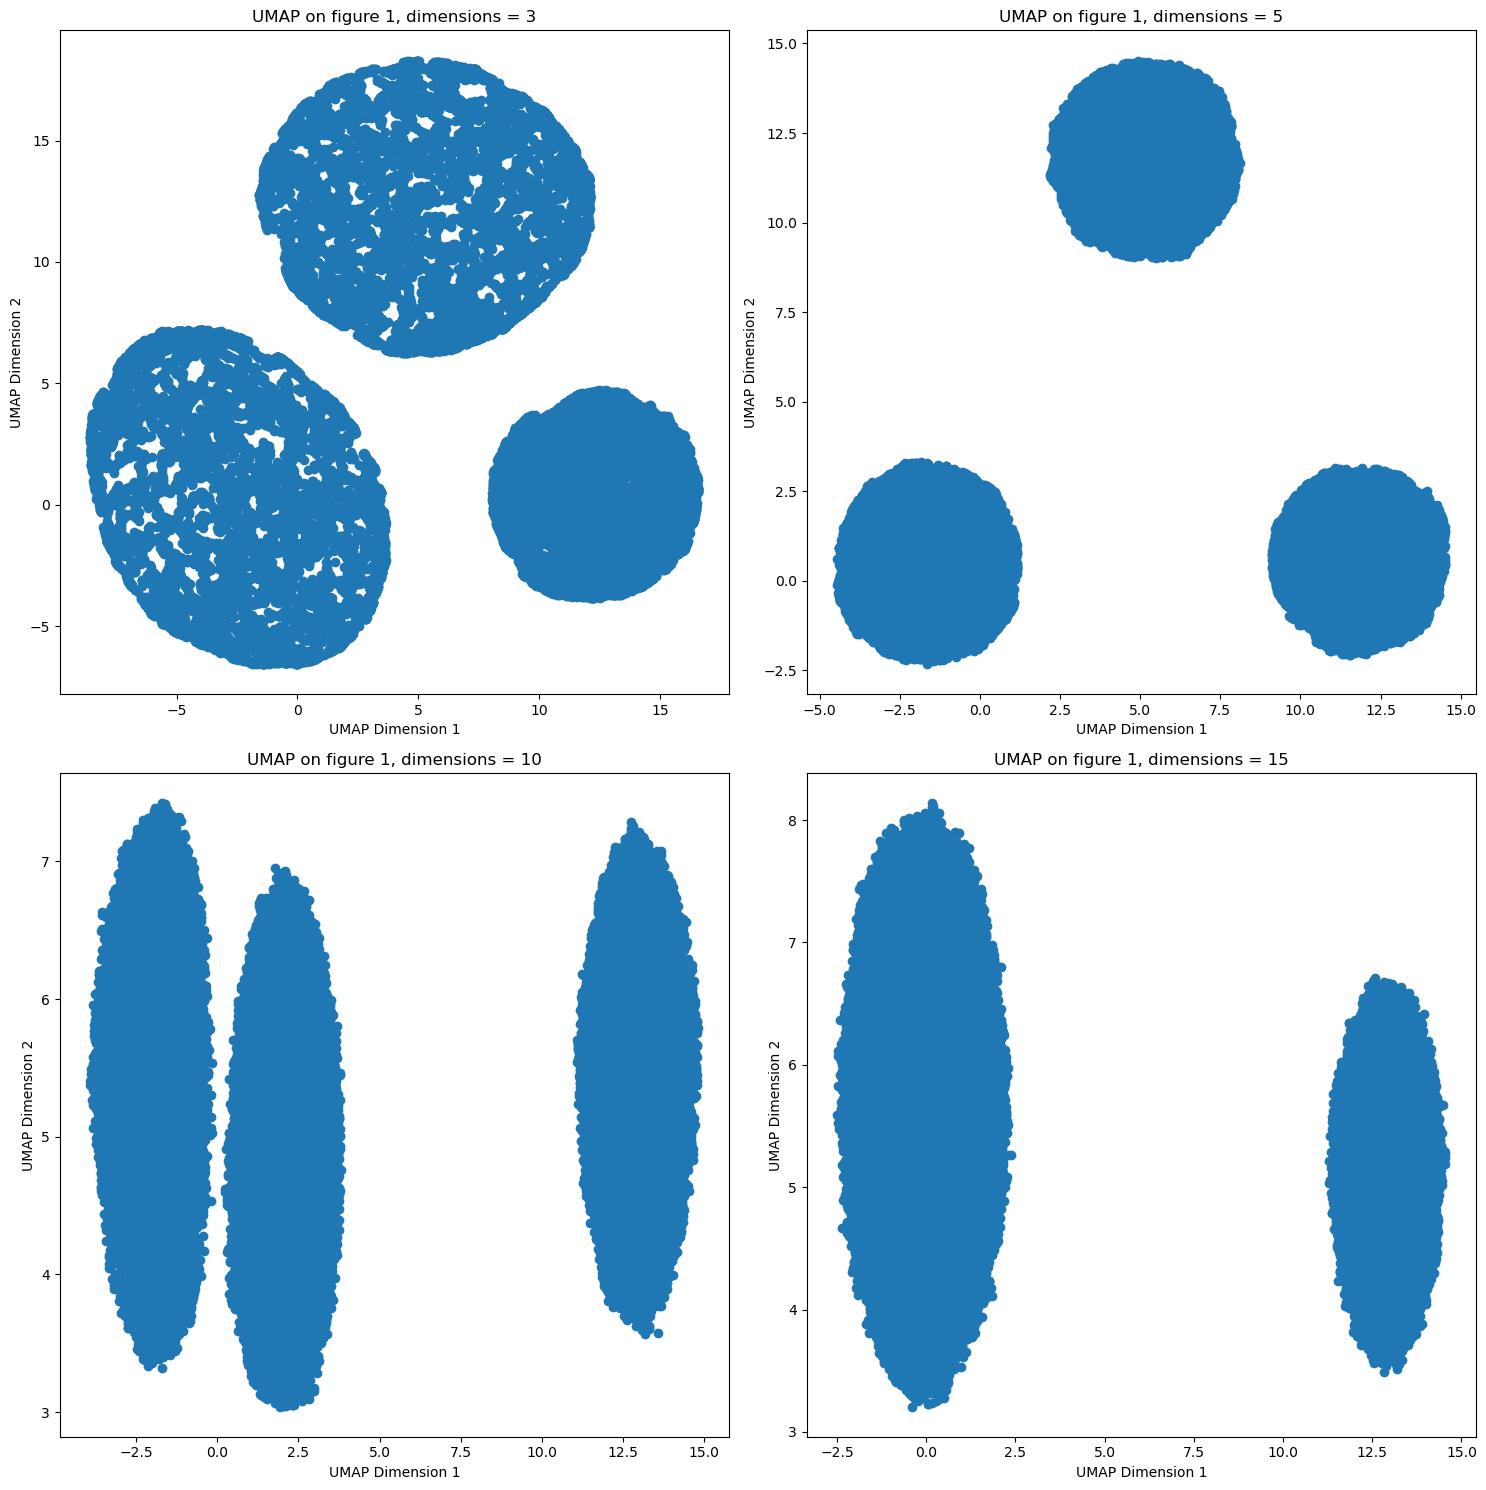

In [26]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
umap_visualisation(dataset_3d_10000p, title='UMAP on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
umap_visualisation(dataset_5d_10000p, title='UMAP on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
umap_visualisation(dataset_10d_10000p, title='UMAP on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
umap_visualisation(dataset_15d_10000p, title='UMAP on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

### TriMAP

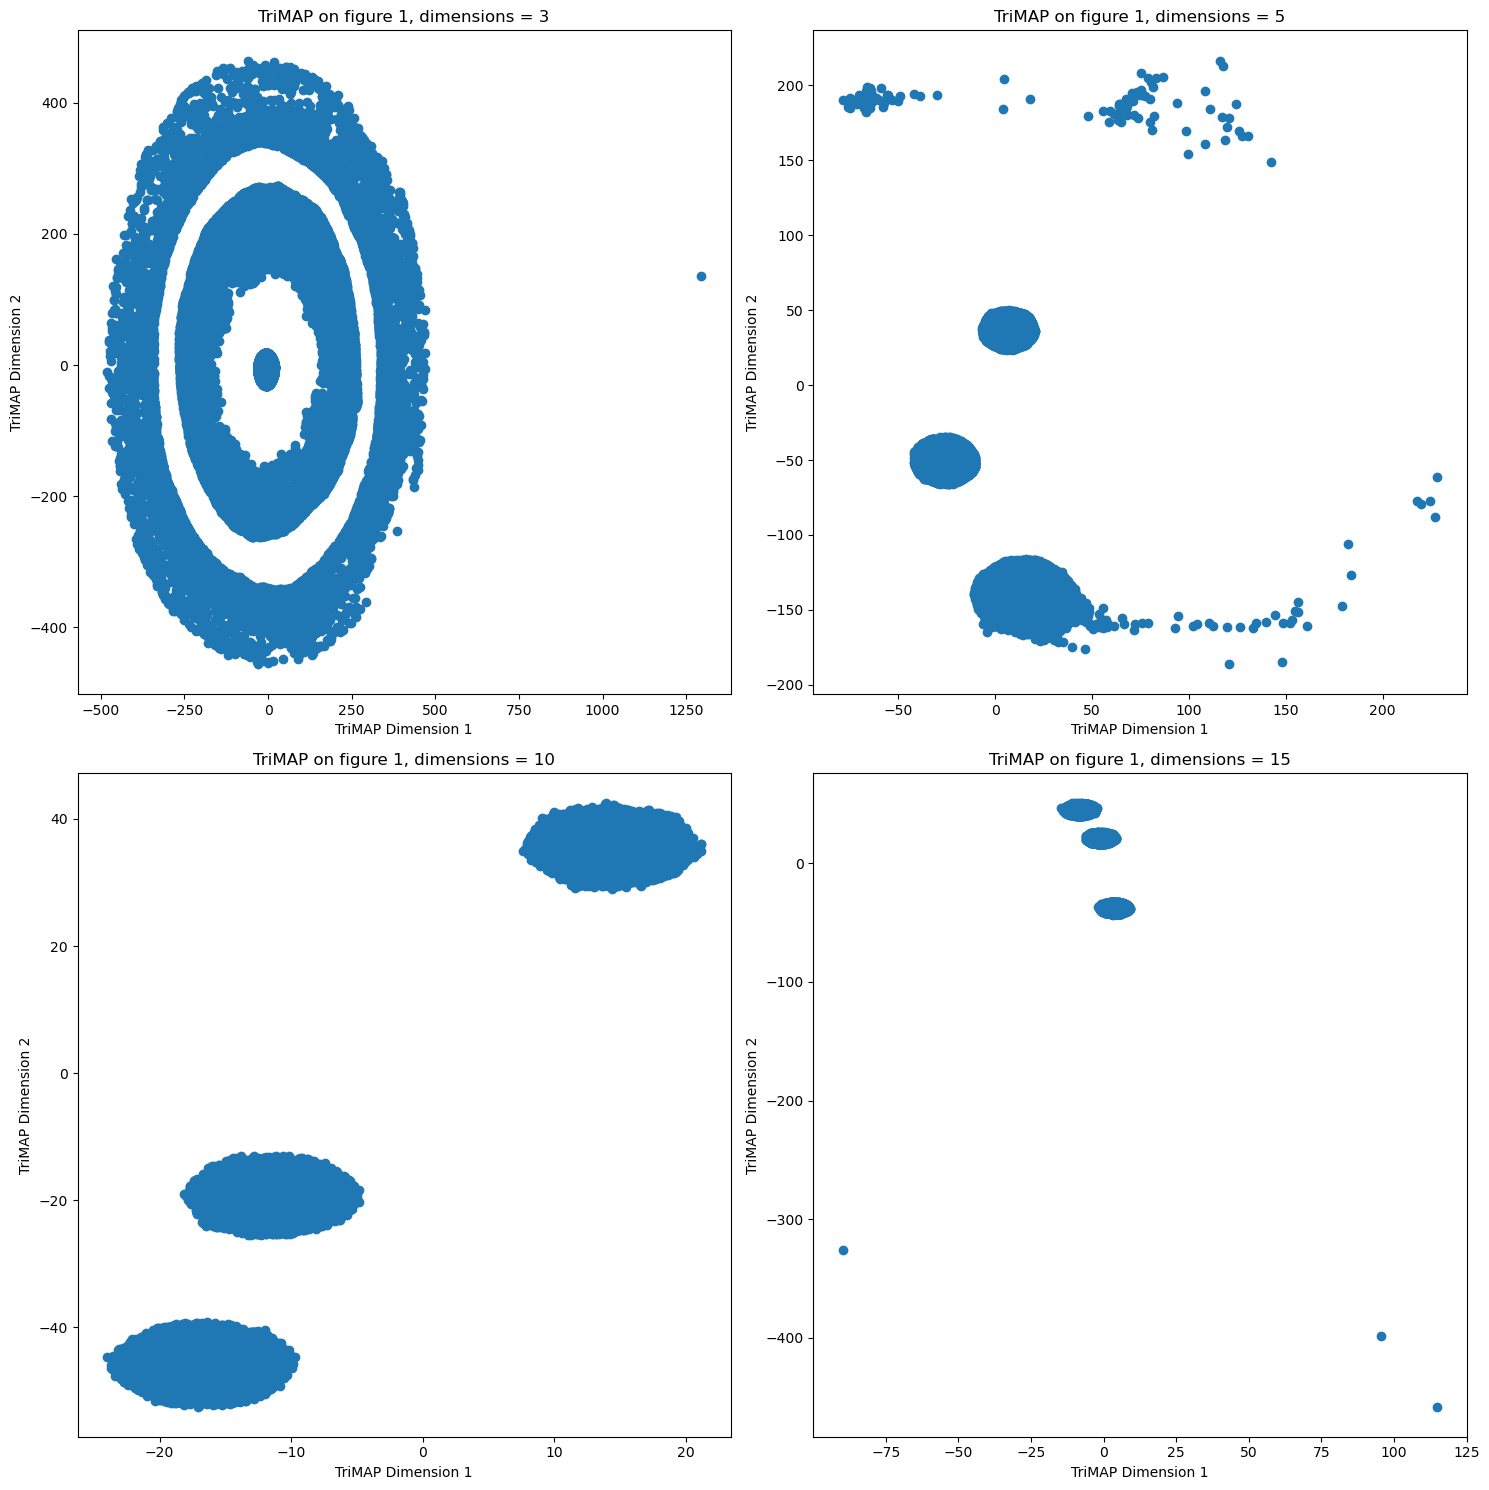

In [27]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
trimap_visualisation(dataset_3d_10000p, title='TriMAP on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
trimap_visualisation(dataset_5d_10000p, title='TriMAP on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
trimap_visualisation(dataset_10d_10000p, title='TriMAP on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
trimap_visualisation(dataset_15d_10000p, title='TriMAP on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Dla 3 wymiarow radzi sobie lepiej przy większej ilości punktów, ale dla większej wariuje

### PaCMAP

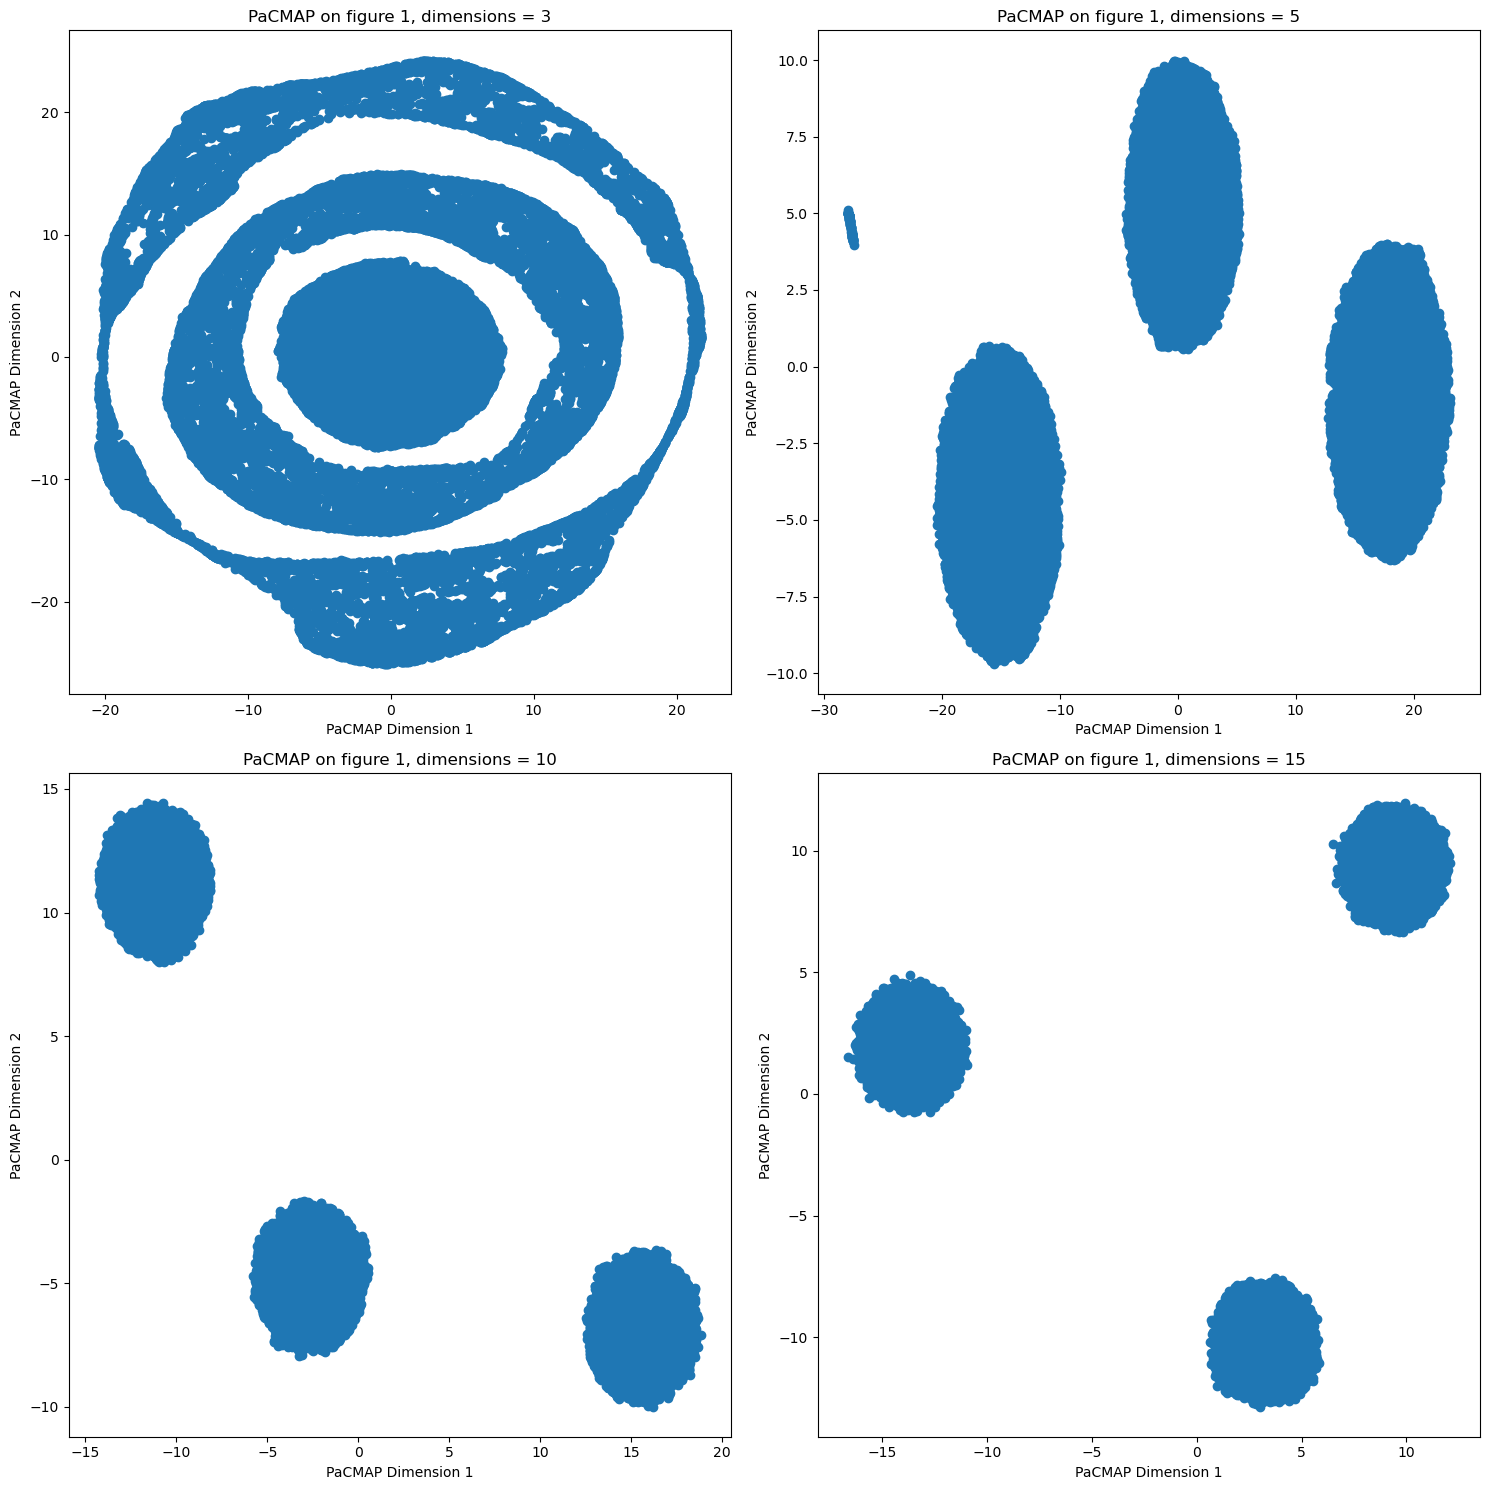

In [28]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
pacmap_visualisation(dataset_3d_10000p, title='PaCMAP on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
pacmap_visualisation(dataset_5d_10000p, title='PaCMAP on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
pacmap_visualisation(dataset_10d_10000p, title='PaCMAP on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
pacmap_visualisation(dataset_15d_10000p, title='PaCMAP on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

Wniosk:
+ Dla 3 wymiarów bardzo ąłdnie rozdzielił lokalnie i globalnie, dla większej liczby wymiarów zachował tylko rozdzielenie lokalne

## Number of points in whole dataset = 300 000, 100 000 in each figure

### TSNE

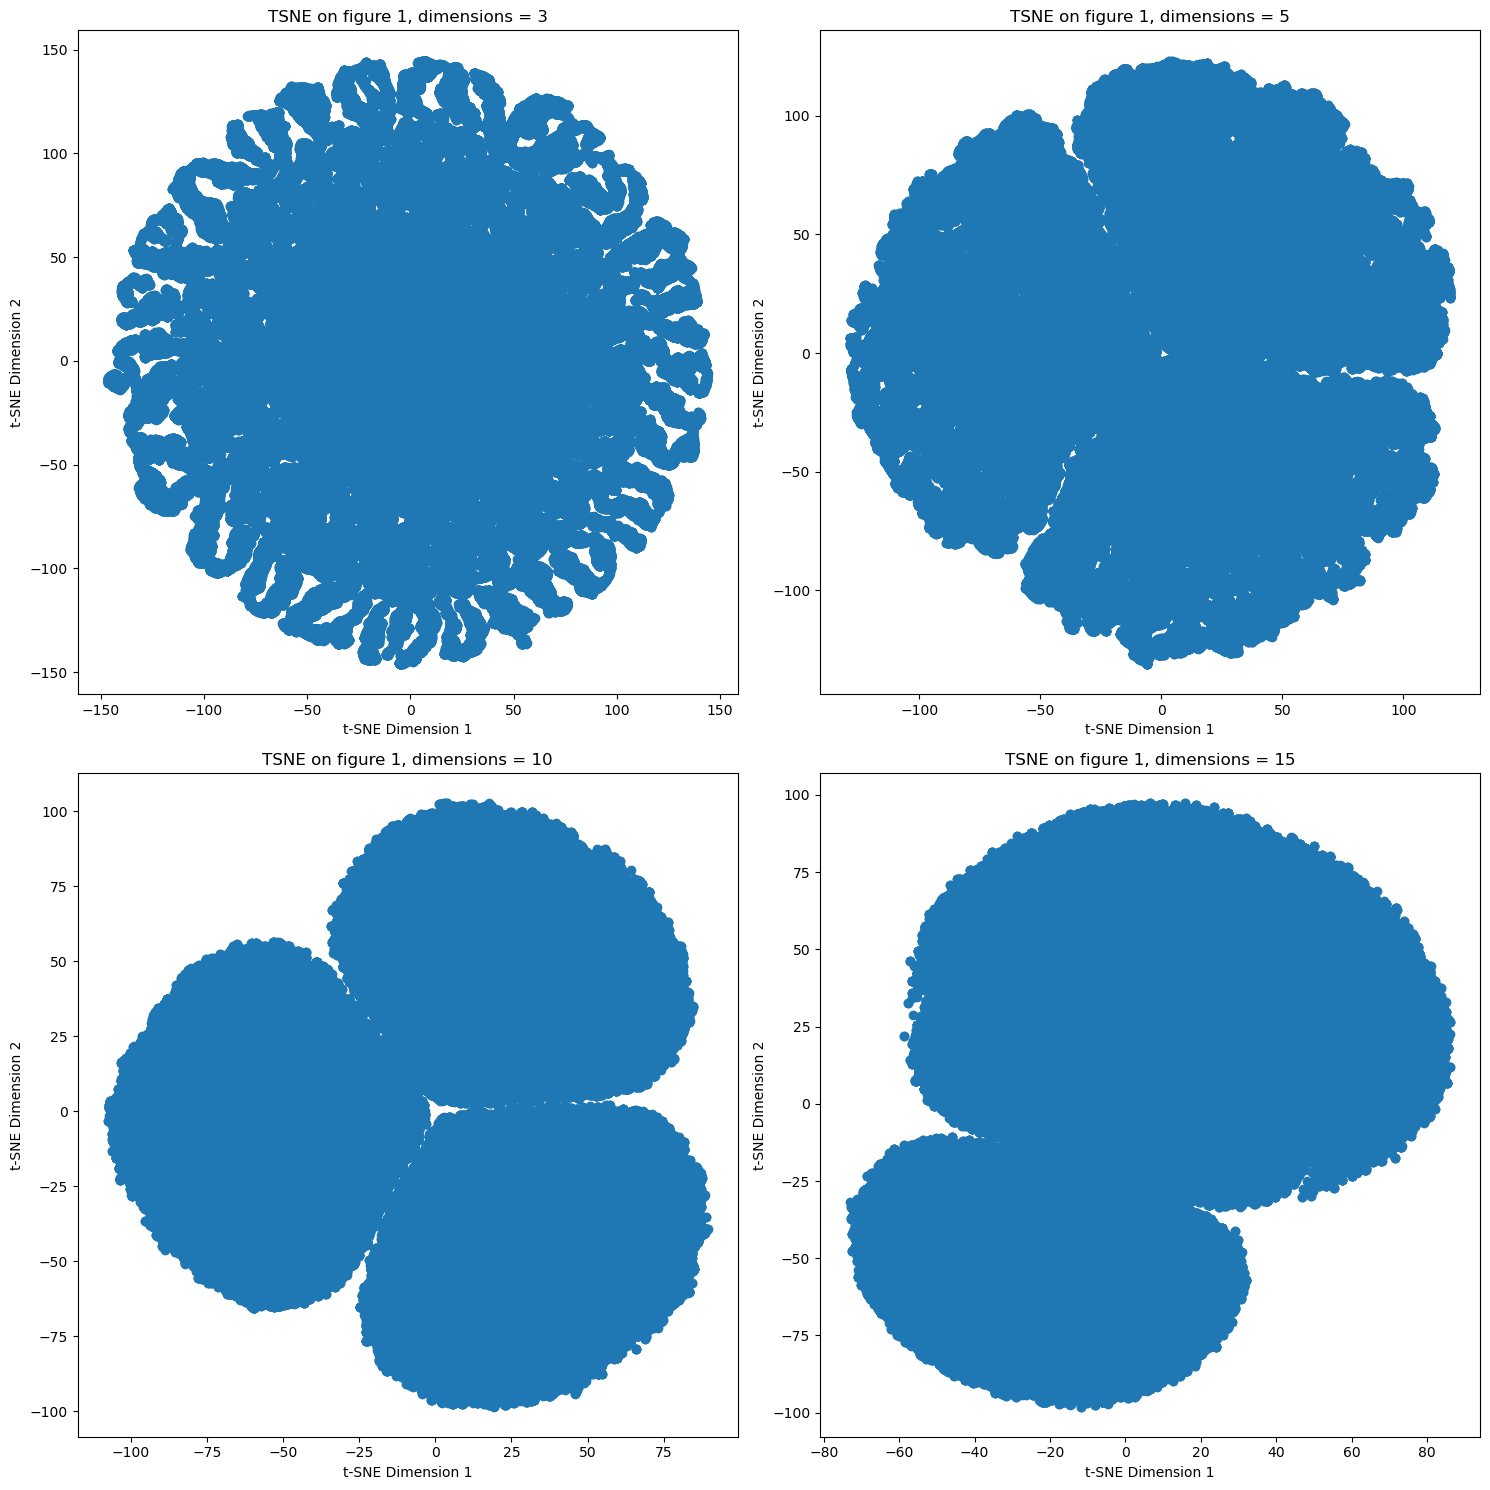

In [32]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
tsne_visualisation(dataset_3d_100000p, title='TSNE on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
tsne_visualisation(dataset_5d_100000p, title='TSNE on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
tsne_visualisation(dataset_10d_100000p, title='TSNE on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
tsne_visualisation(dataset_15d_100000p, title='TSNE on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

### UMAP

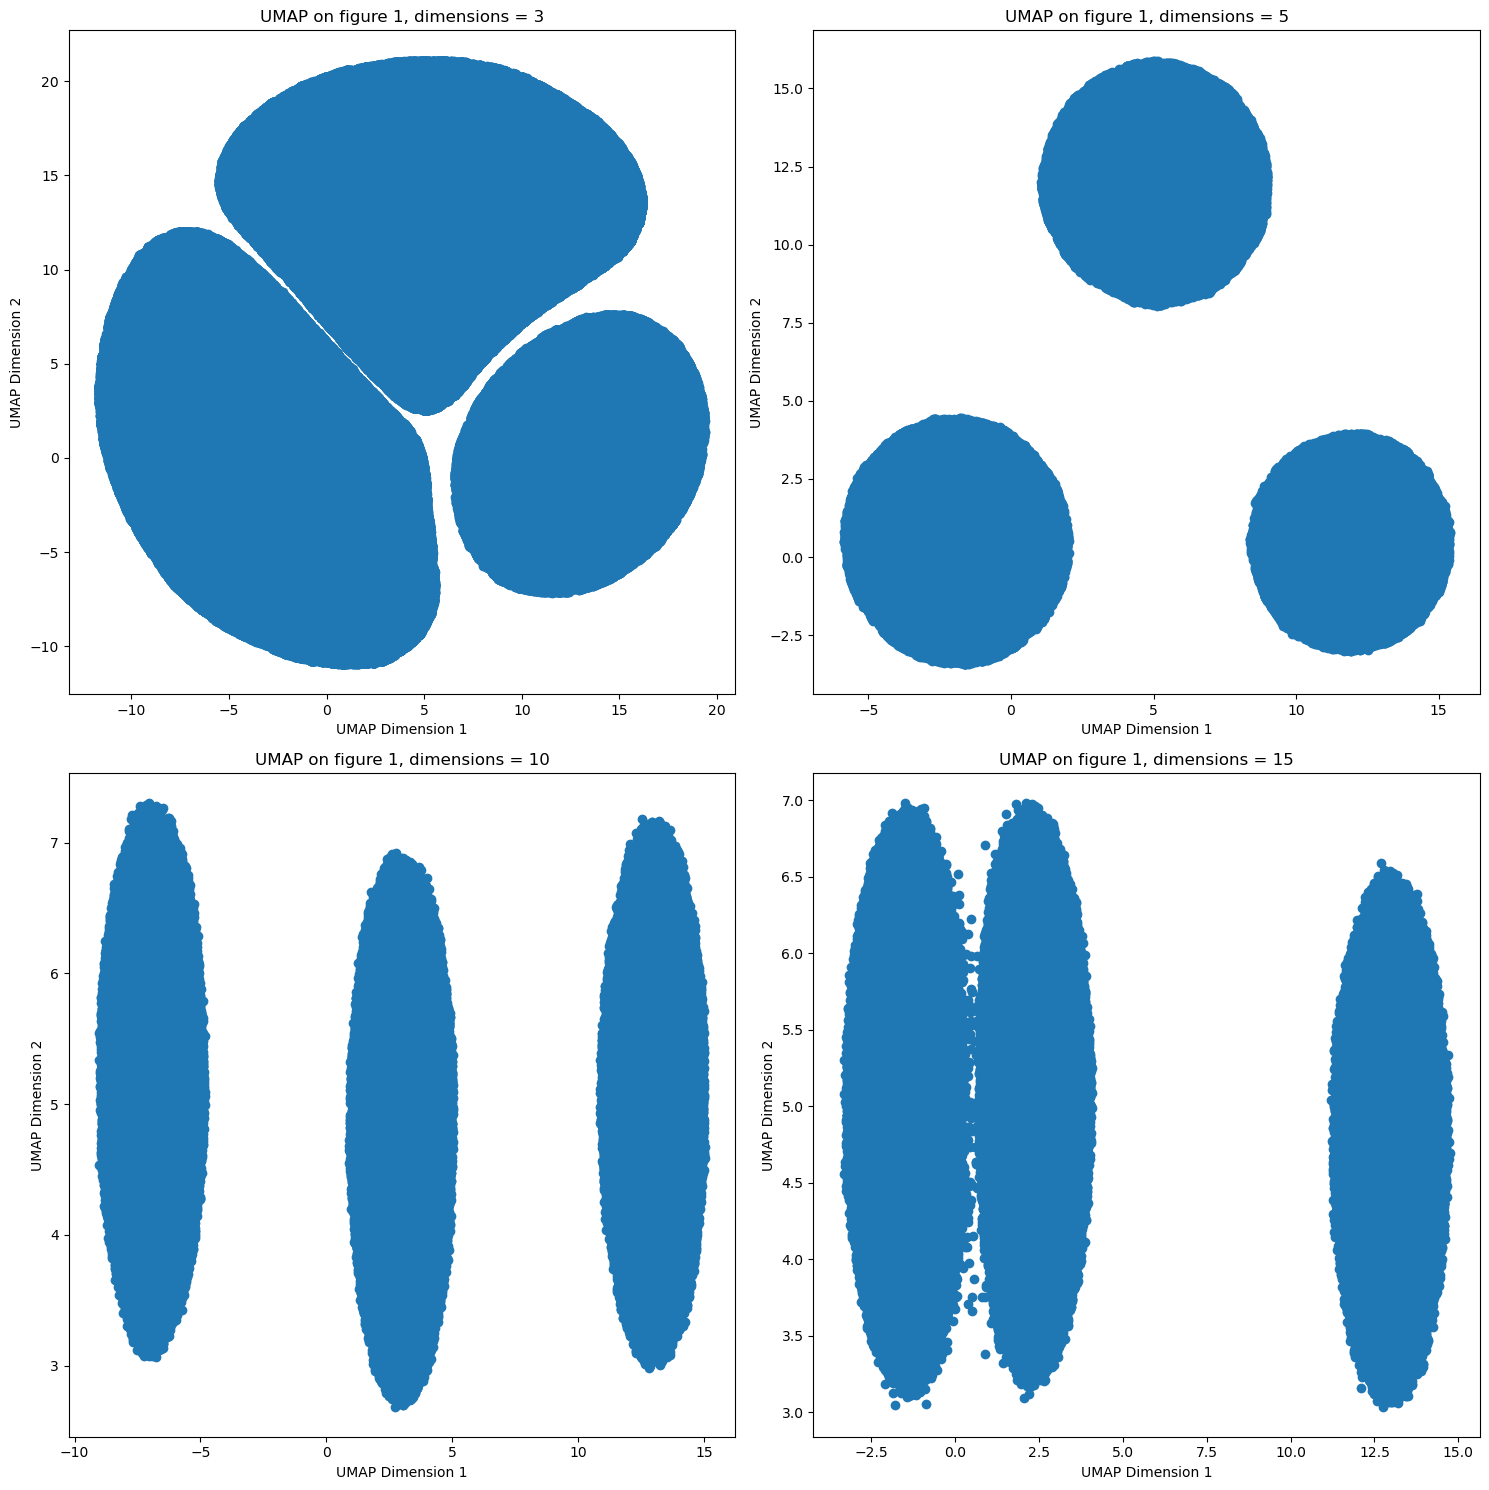

In [30]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
umap_visualisation(dataset_3d_100000p, title='UMAP on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
umap_visualisation(dataset_5d_100000p, title='UMAP on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
umap_visualisation(dataset_10d_100000p, title='UMAP on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
umap_visualisation(dataset_15d_100000p, title='UMAP on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Dla 3 wymiarów bardzo małe odległości, co ciekawe lepiej zachowuje się dla 5 i 10 wymiarów niż dla 3

### TriMAP

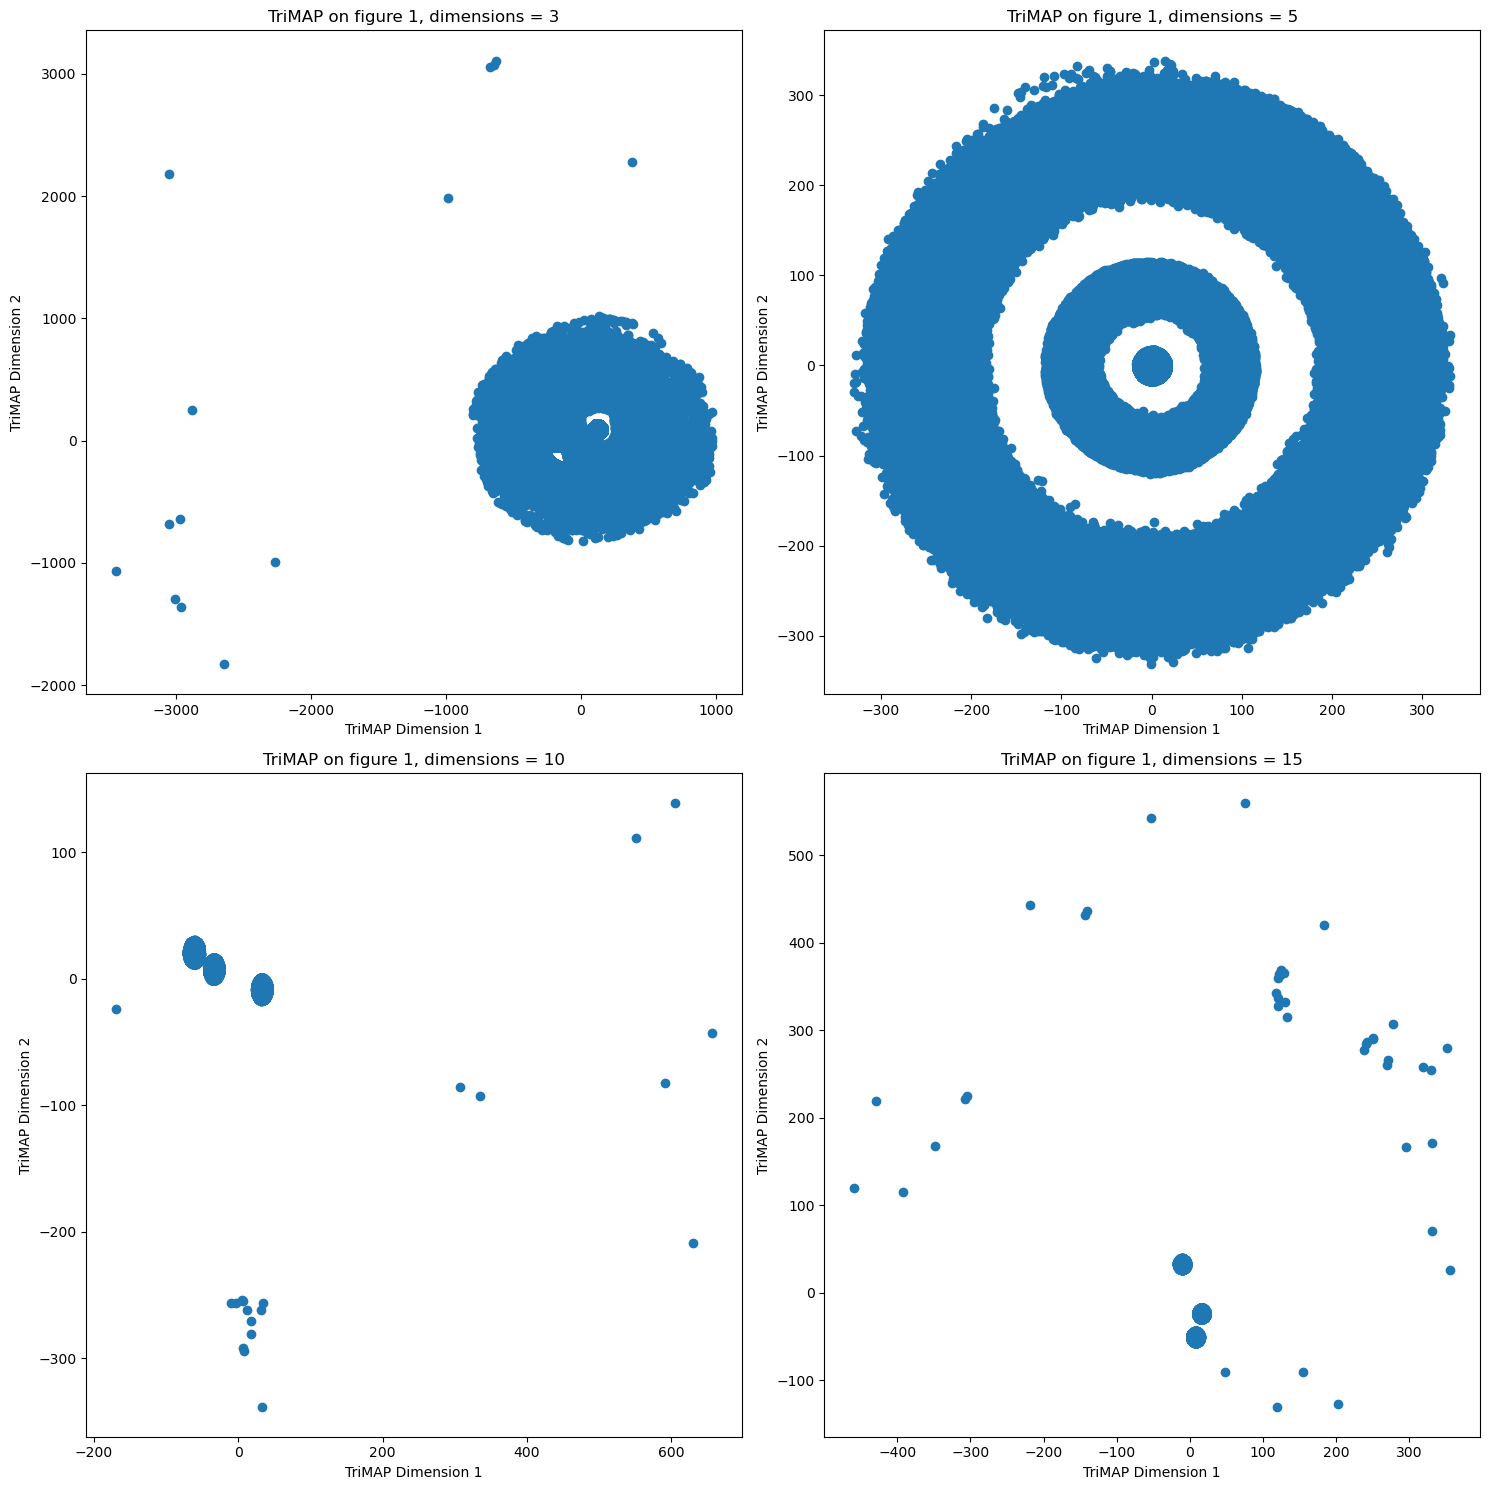

In [31]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
trimap_visualisation(dataset_3d_100000p, title='TriMAP on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
trimap_visualisation(dataset_5d_100000p, title='TriMAP on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
trimap_visualisation(dataset_10d_100000p, title='TriMAP on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
trimap_visualisation(dataset_15d_100000p, title='TriMAP on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Dla 5 wwymiarów git, reszta noise

### PaCMAP

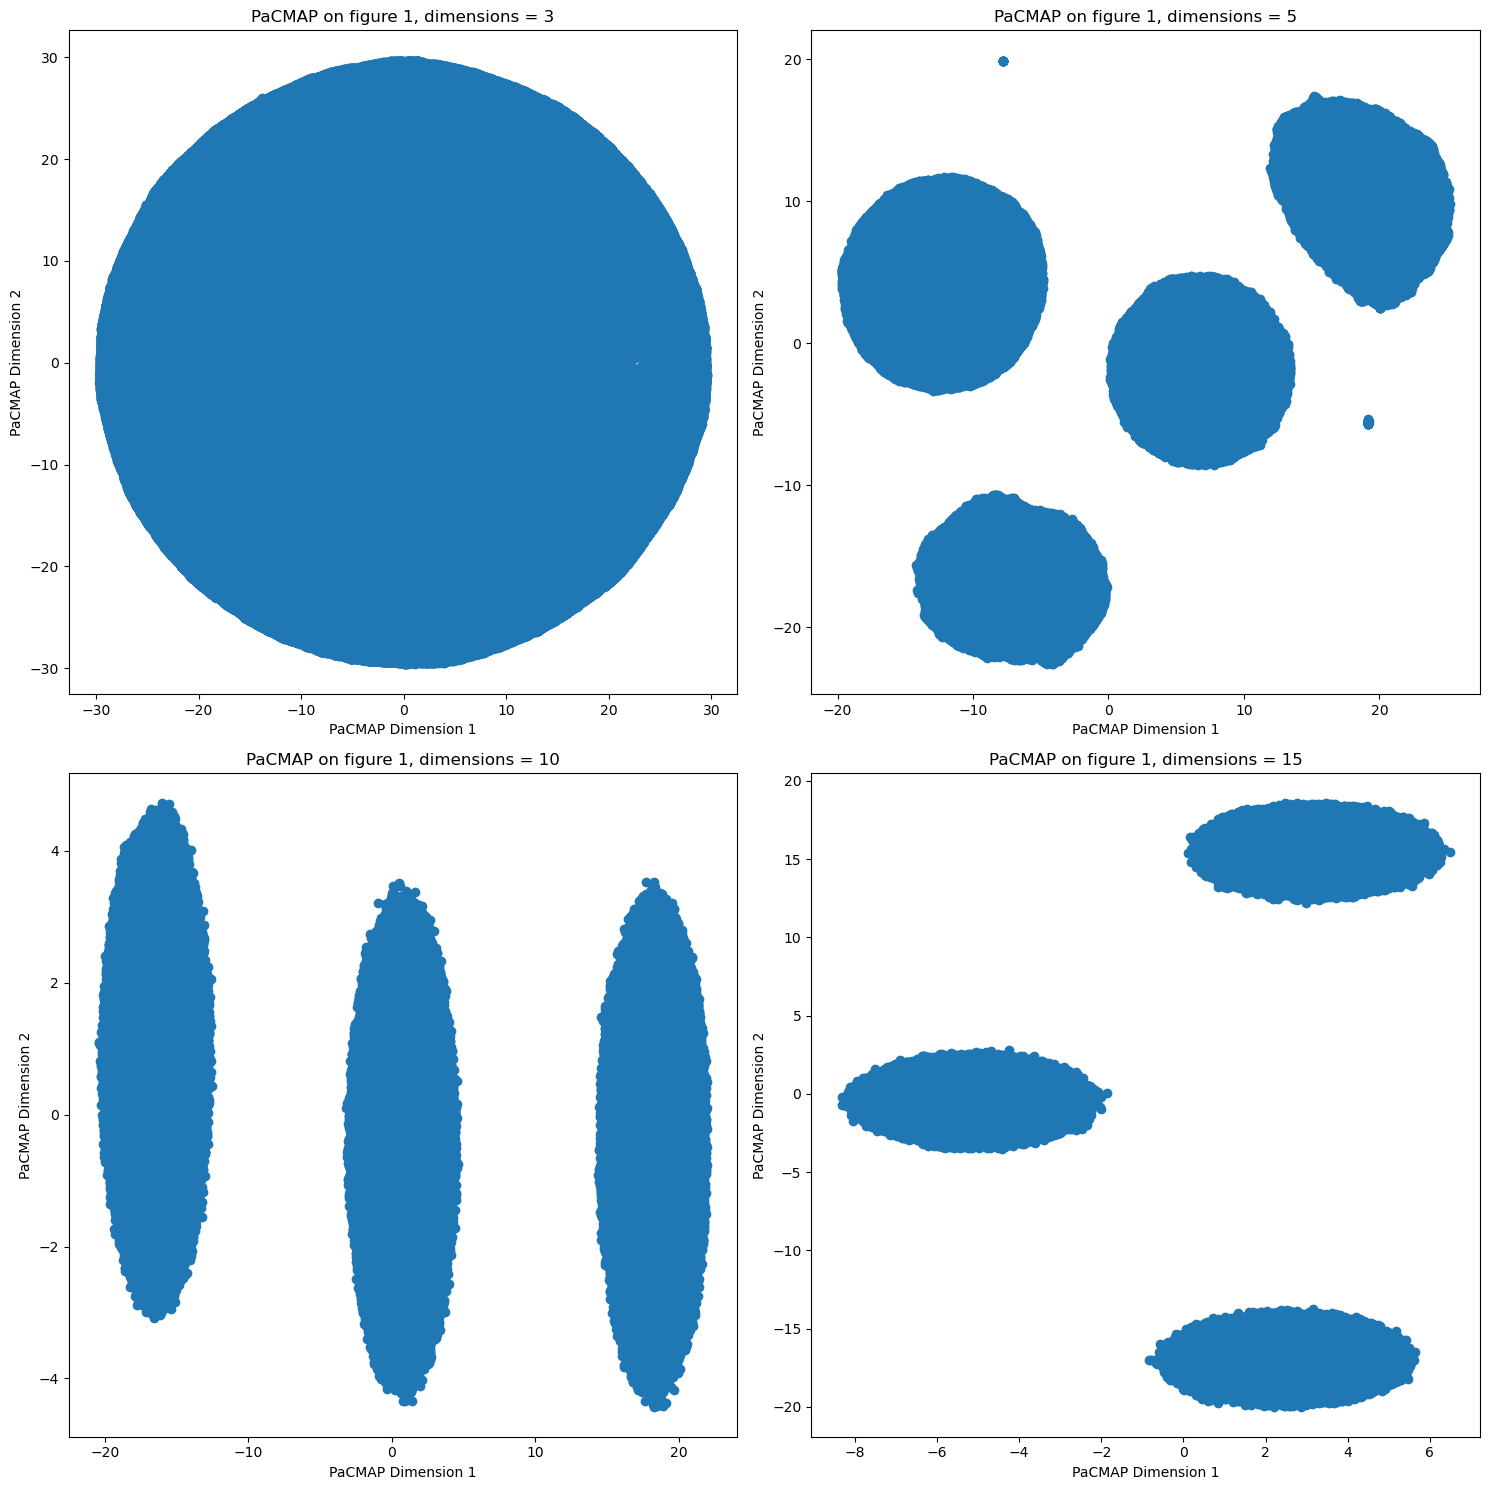

In [32]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
pacmap_visualisation(dataset_3d_100000p, title='PaCMAP on figure 1, dimensions = 3')
plt.subplot(2, 2, 2)
pacmap_visualisation(dataset_5d_100000p, title='PaCMAP on figure 1, dimensions = 5')
plt.subplot(2, 2, 3)
pacmap_visualisation(dataset_10d_100000p, title='PaCMAP on figure 1, dimensions = 10')
plt.subplot(2, 2, 4)
pacmap_visualisation(dataset_15d_100000p, title='PaCMAP on figure 1, dimensions = 15')

plt.tight_layout()
plt.show()

**Ogólne wnioski dla datasetu z 300 000 punktami** 
+ Algorytmy redukcji wymiarowości lepiej sobie radzą dla figur o większej liczbie wymiarów (10, 15)

# Dataset 2 - Torus in sphere 

## Number of points in whole dataset = 3000, 1000 points in each figure

### TSNE

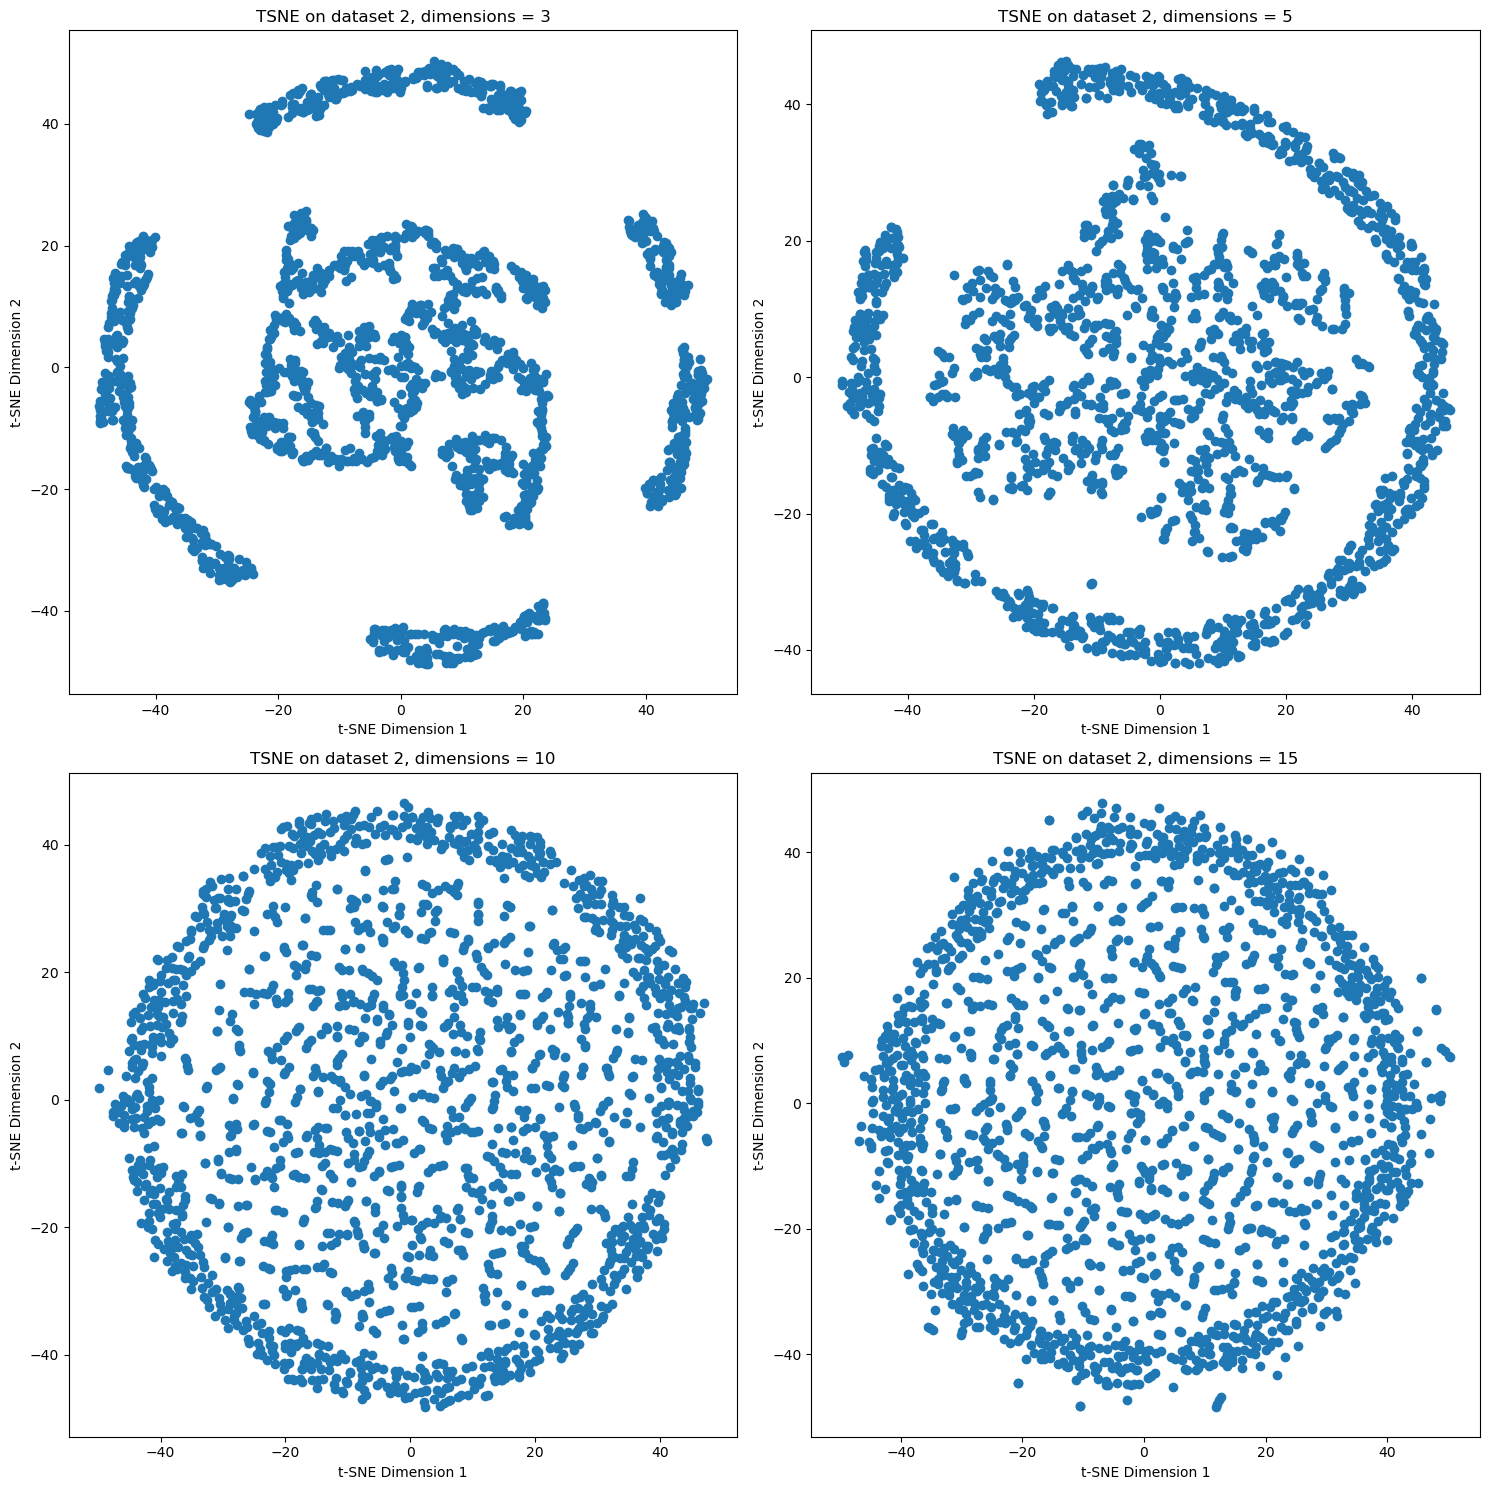

In [60]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
tsne_visualisation(dataset_3d_1000p_2, title='TSNE on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
tsne_visualisation(dataset_5d_1000p_2, title='TSNE on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
tsne_visualisation(dataset_10d_1000p_2, title='TSNE on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
tsne_visualisation(dataset_15d_1000p_2, title='TSNE on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

### UMAP

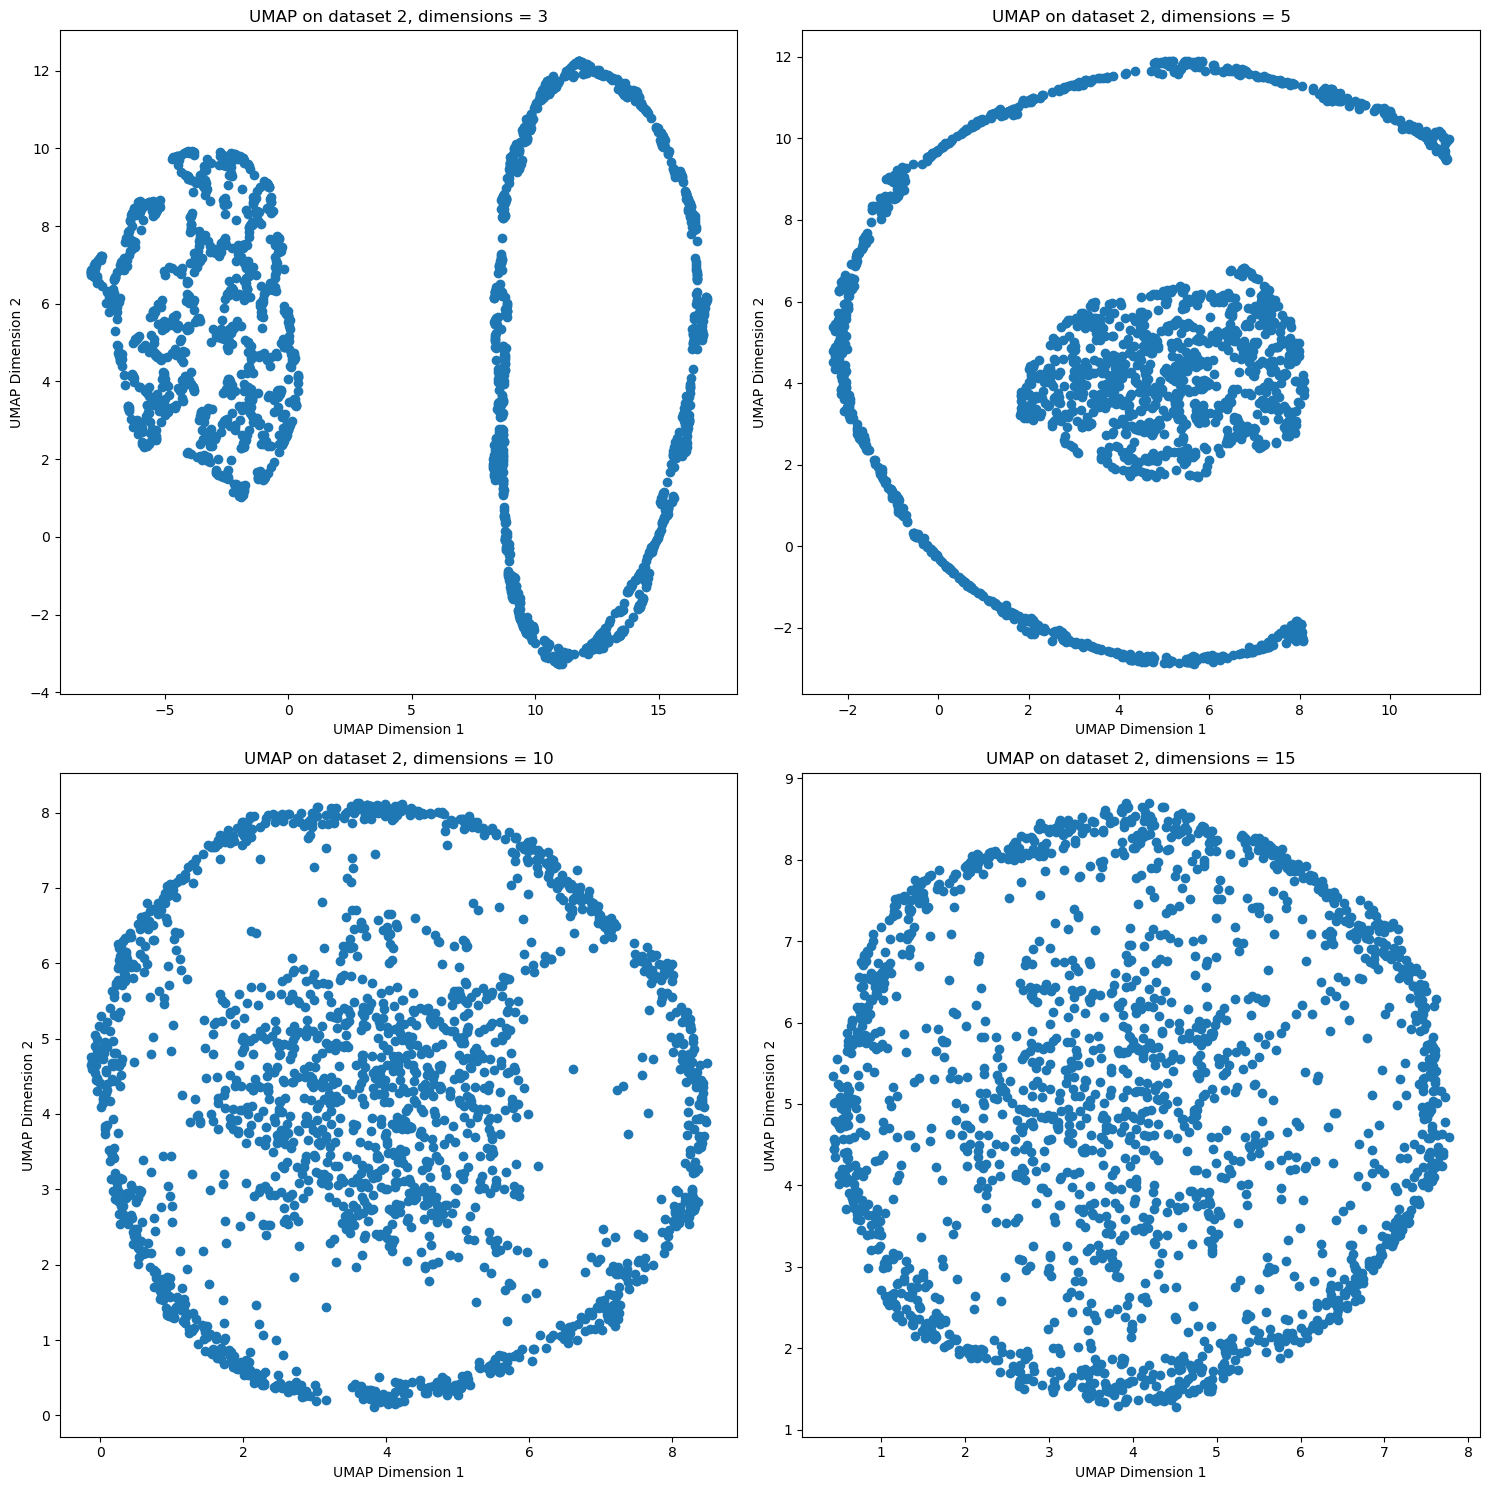

In [61]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
umap_visualisation(dataset_3d_1000p_2, title='UMAP on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
umap_visualisation(dataset_5d_1000p_2, title='UMAP on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
umap_visualisation(dataset_10d_1000p_2, title='UMAP on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
umap_visualisation(dataset_15d_1000p_2, title='UMAP on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

### TriMAP

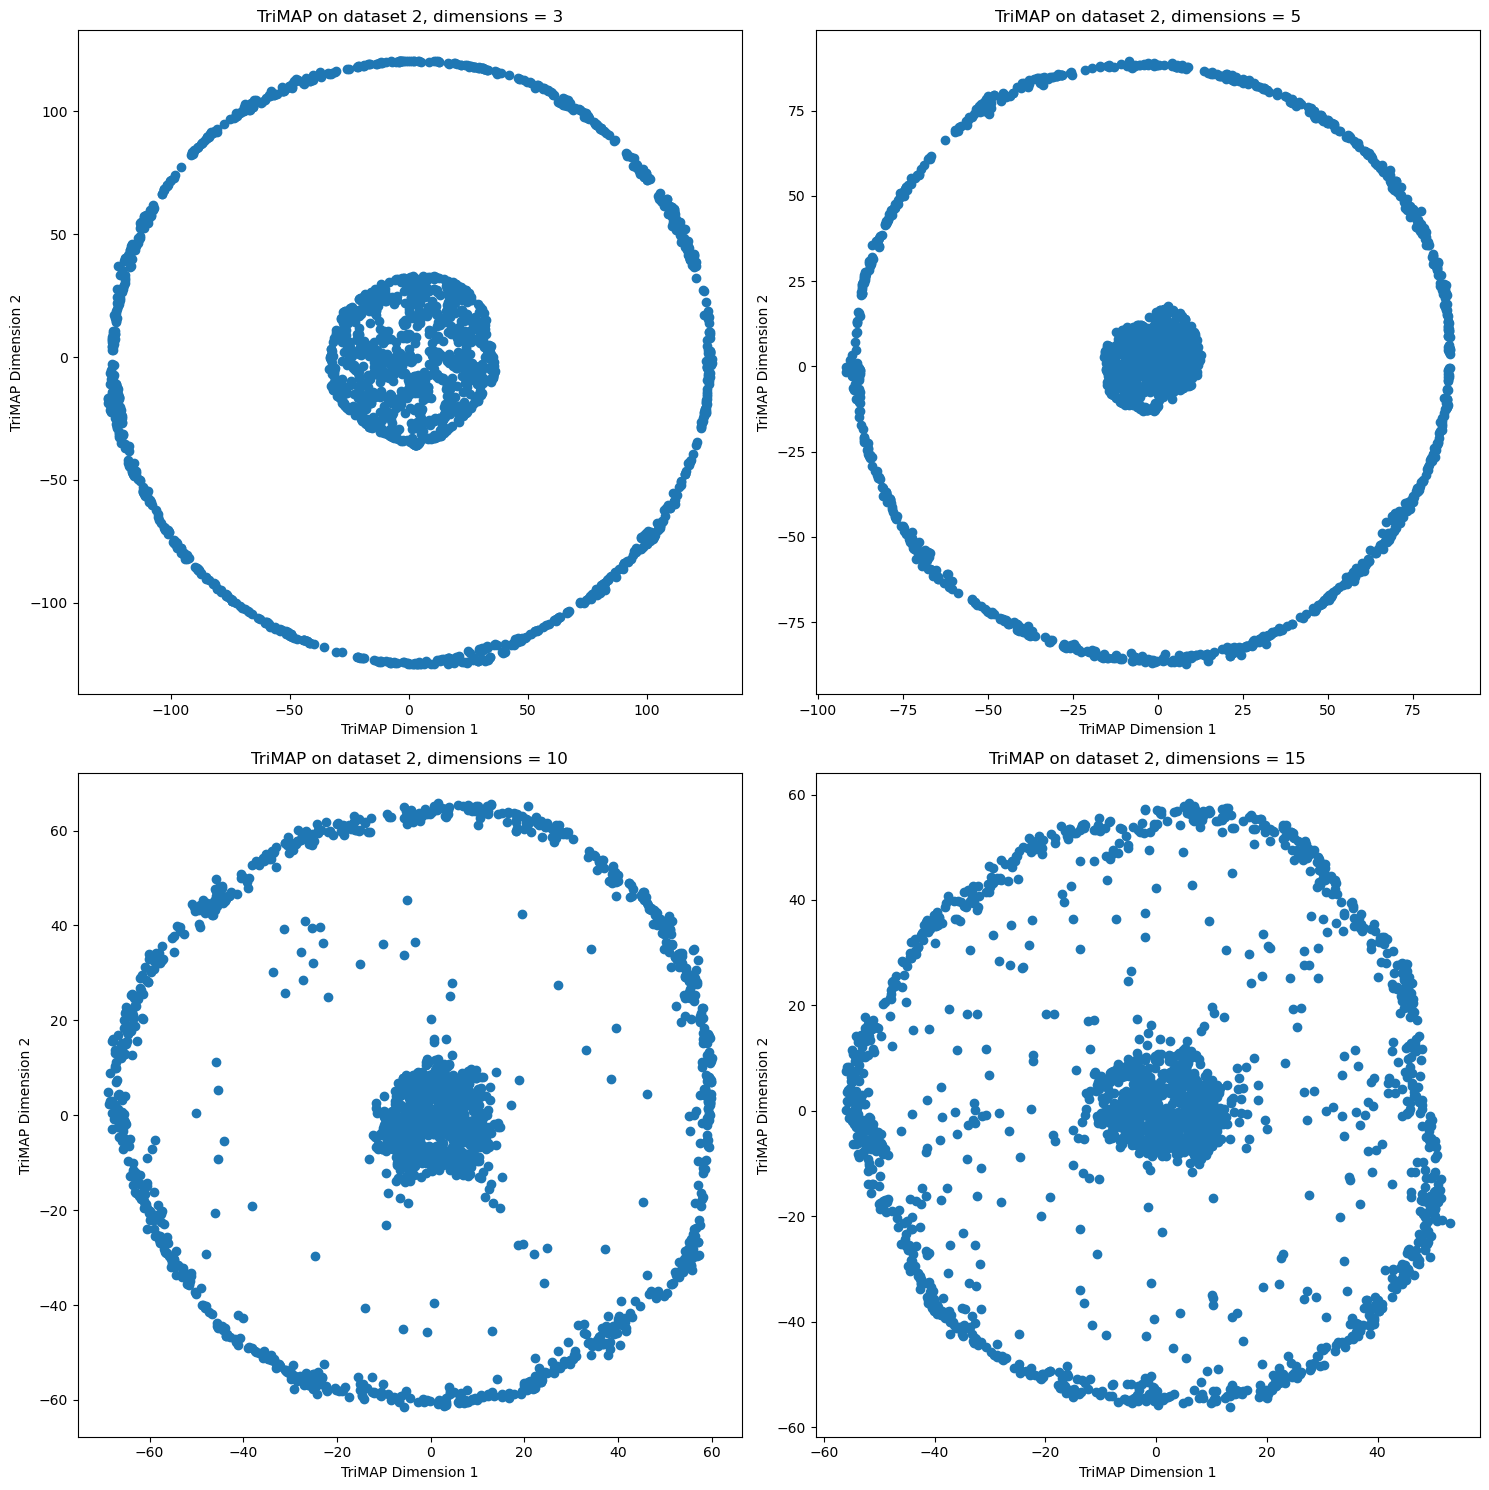

In [62]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
trimap_visualisation(dataset_3d_1000p_2, title='TriMAP on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
trimap_visualisation(dataset_5d_1000p_2, title='TriMAP on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
trimap_visualisation(dataset_10d_1000p_2, title='TriMAP on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
trimap_visualisation(dataset_15d_1000p_2, title='TriMAP on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Tu idealnie pokazuje ze im wiecej wymiarow tym gorzej sobie radzi, ale ogolnie podzial jest ok

### PaCMAP

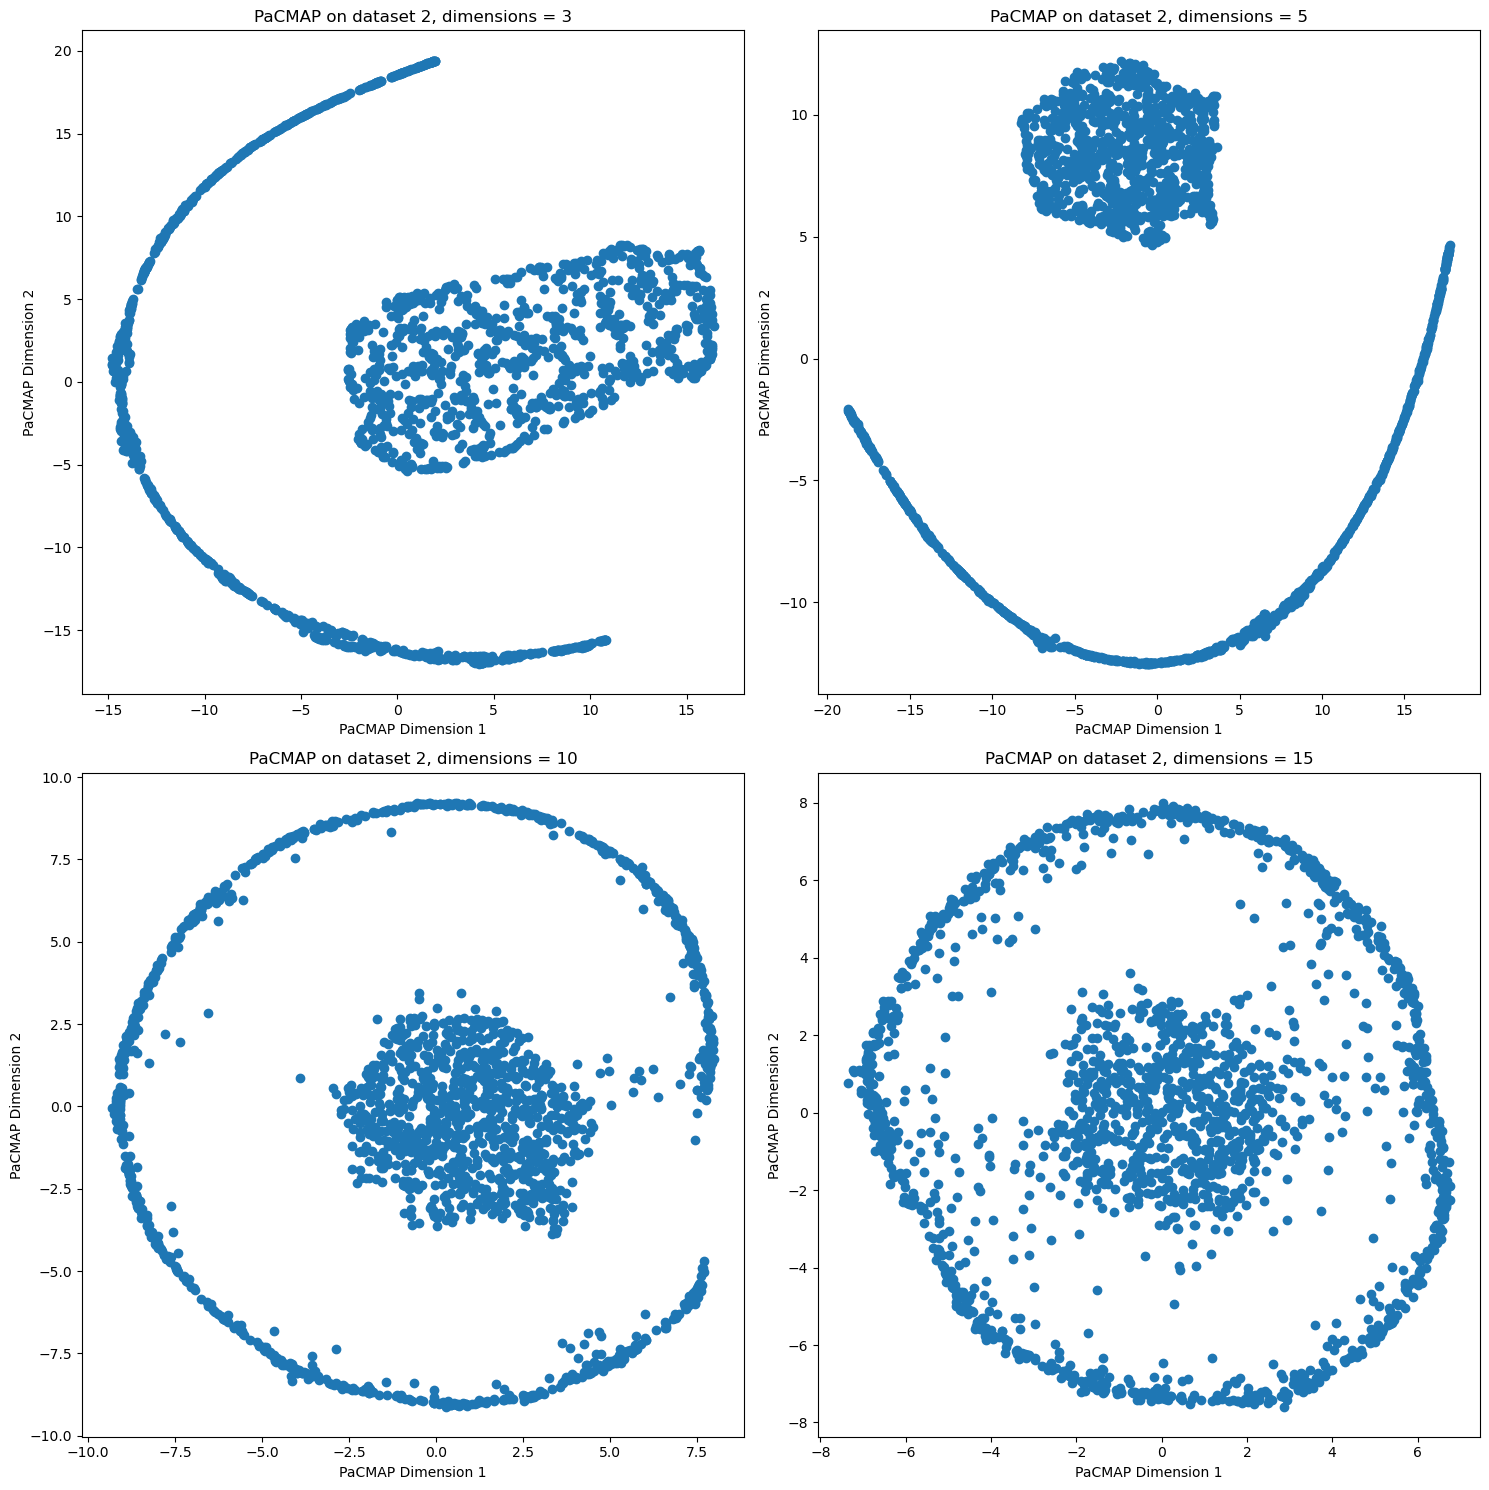

In [63]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
pacmap_visualisation(dataset_3d_1000p_2, title='PaCMAP on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
pacmap_visualisation(dataset_5d_1000p_2, title='PaCMAP on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
pacmap_visualisation(dataset_10d_1000p_2, title='PaCMAP on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
pacmap_visualisation(dataset_15d_1000p_2, title='PaCMAP on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Czy to oznacza ze dla 10 wymjairow w tym przypadku poradzil sobie najlepoiej?

## Number of points in whole dataset = 30 000, 10 000 in each figure

### TSNE

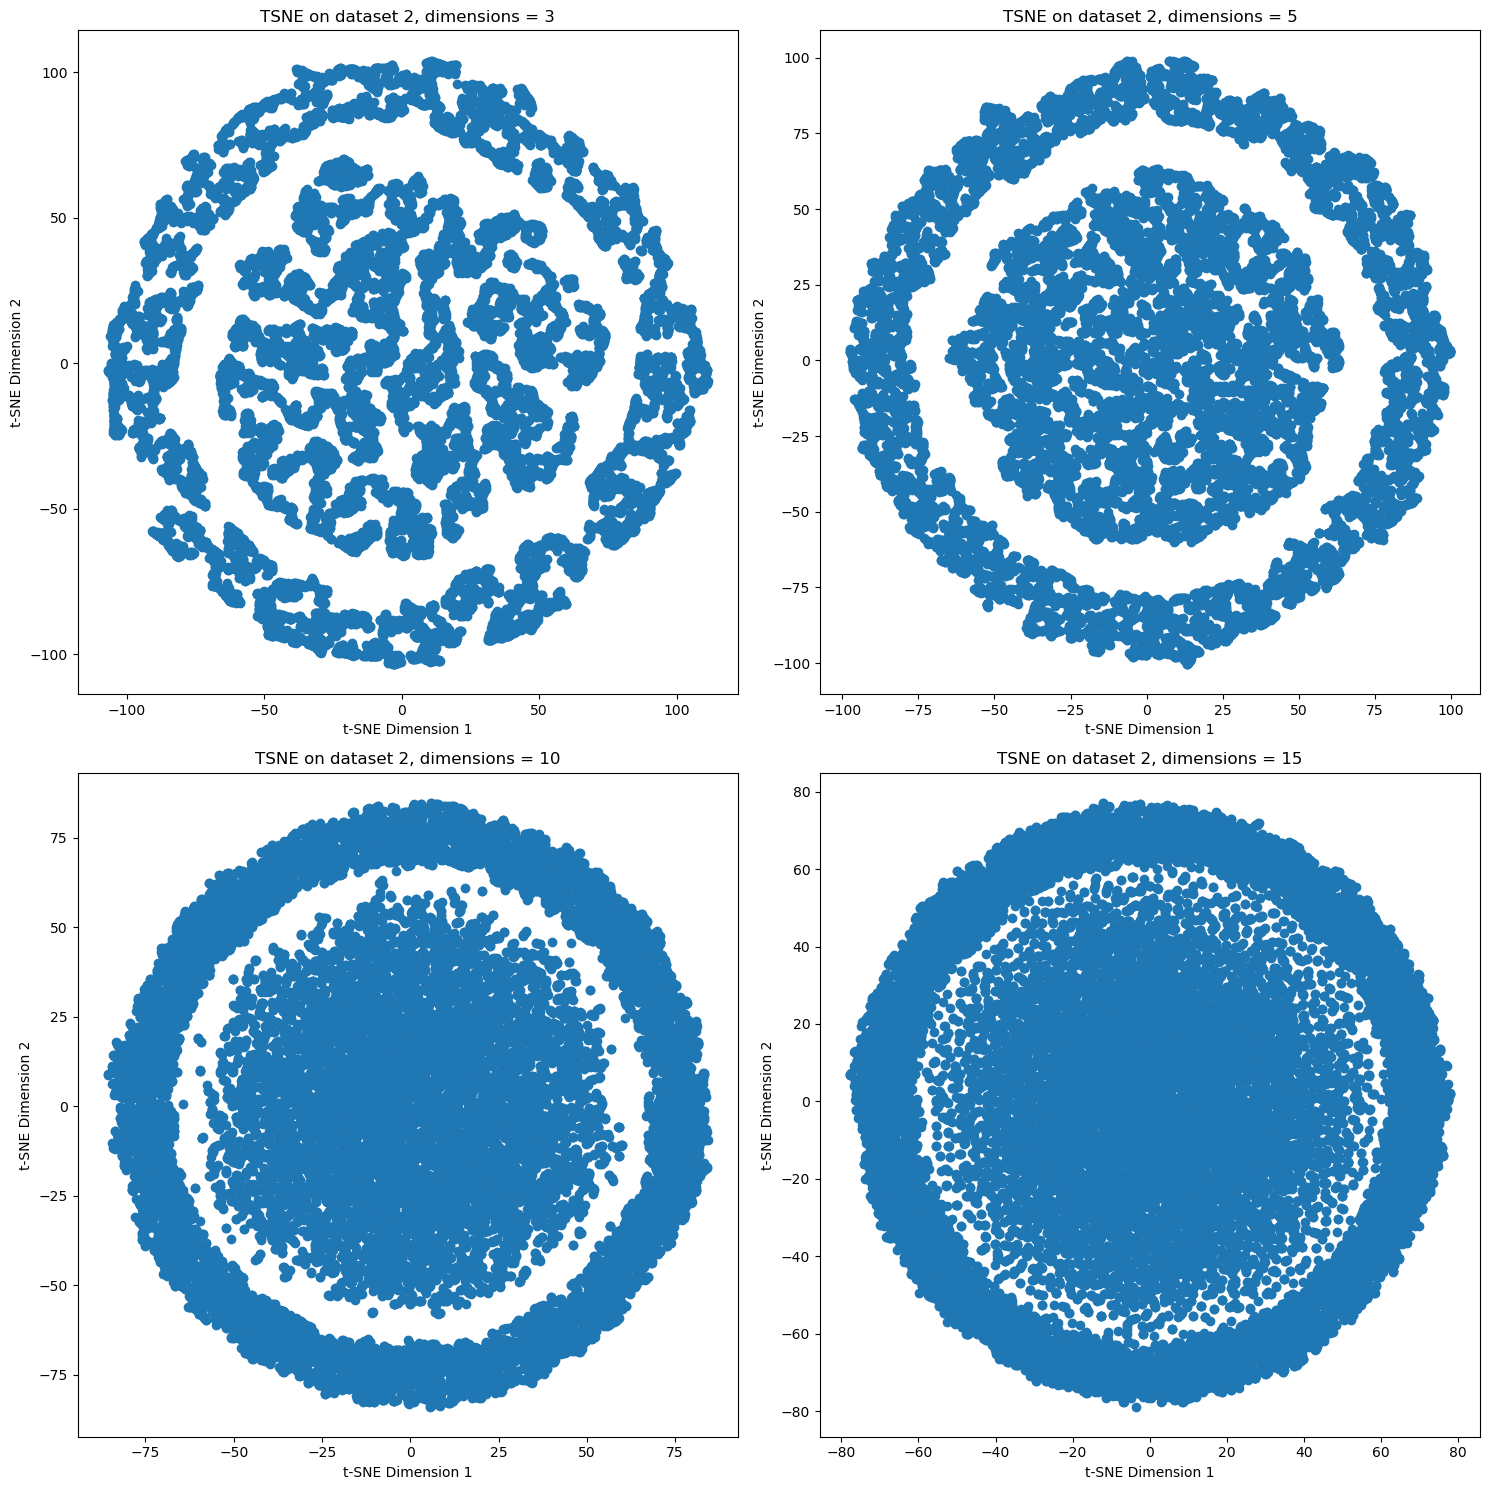

In [108]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
tsne_visualisation(dataset_3d_10000p_2, title='TSNE on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
tsne_visualisation(dataset_5d_10000p_2, title='TSNE on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
tsne_visualisation(dataset_10d_10000p_2, title='TSNE on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
tsne_visualisation(dataset_15d_10000p_2, title='TSNE on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Dla 10000 punktow lepiej niz dla 1000

### UMAP

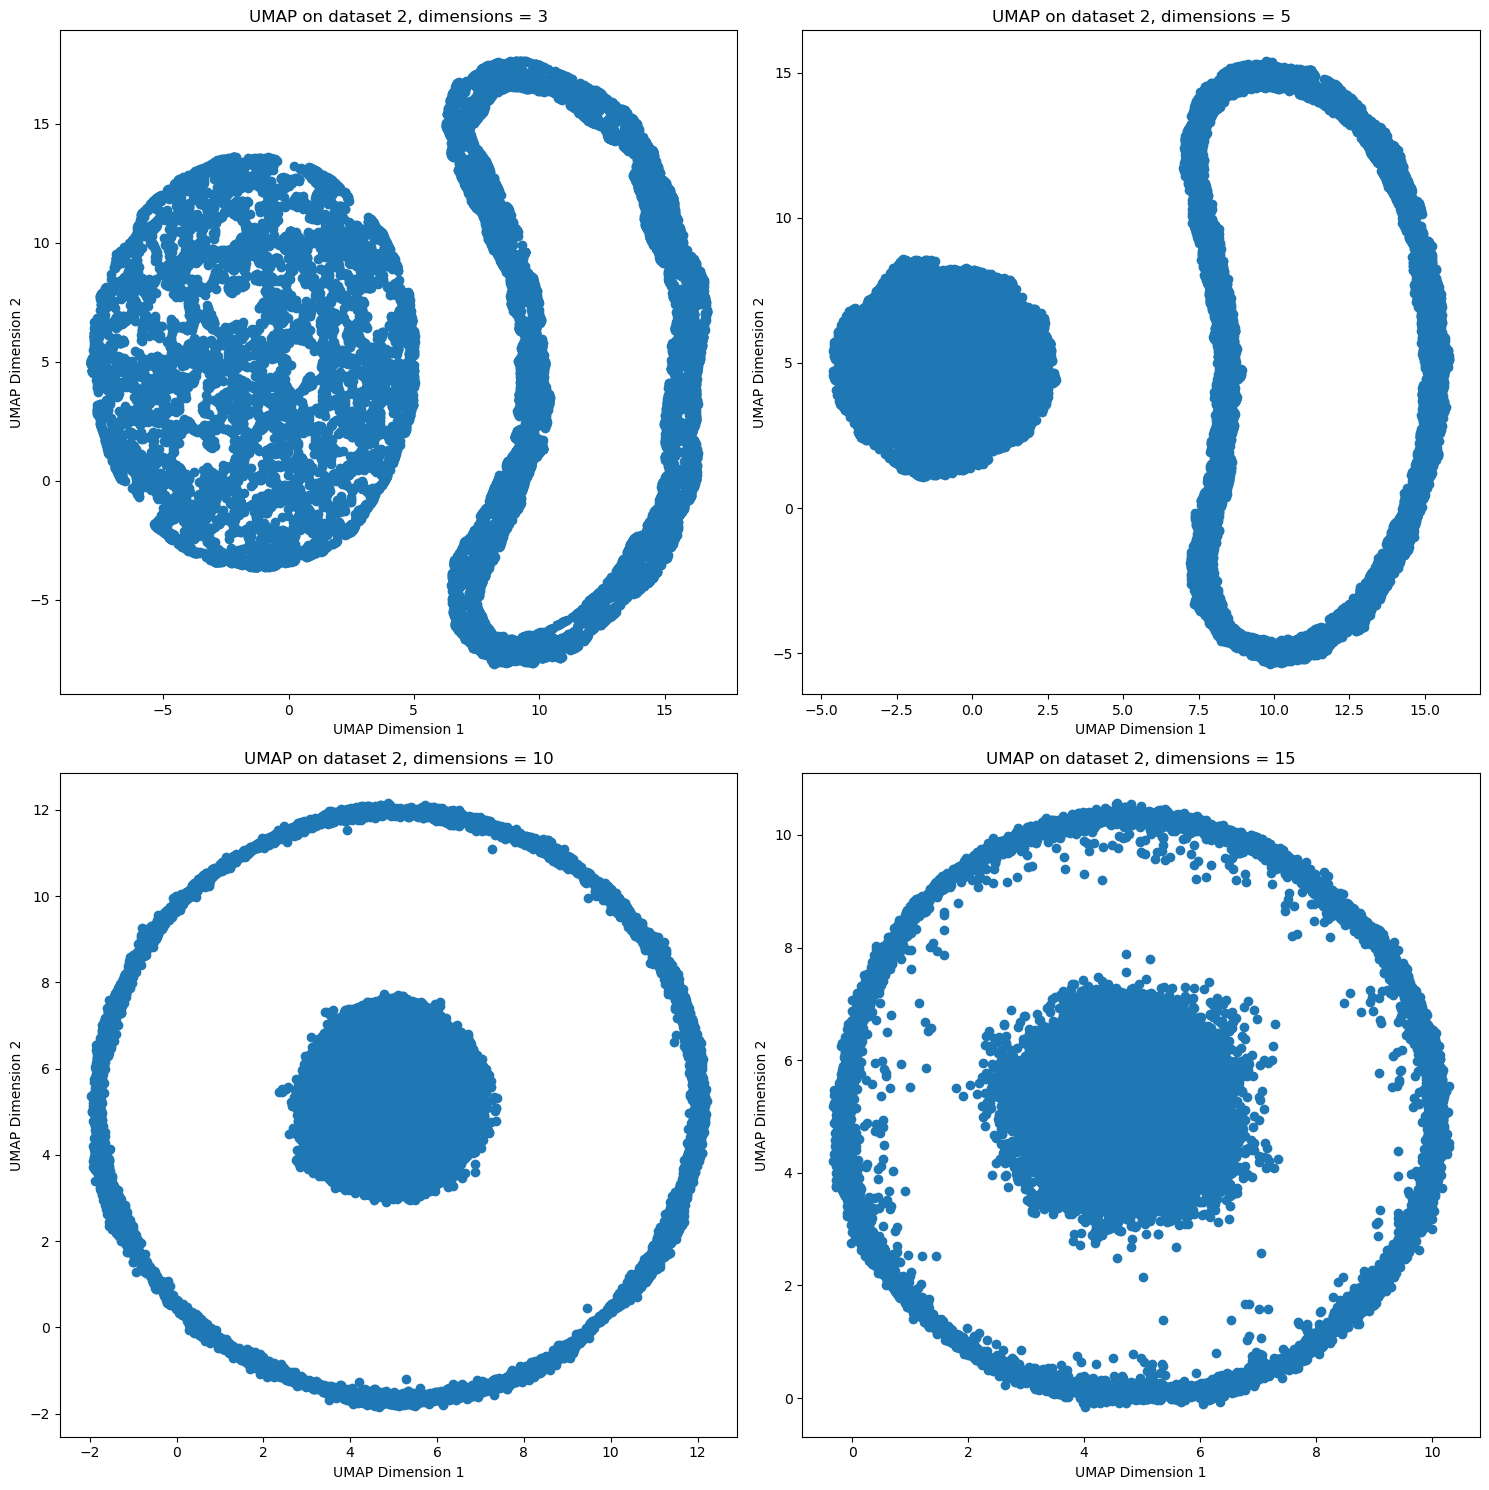

In [65]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
umap_visualisation(dataset_3d_10000p_2, title='UMAP on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
umap_visualisation(dataset_5d_10000p_2, title='UMAP on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
umap_visualisation(dataset_10d_10000p_2, title='UMAP on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
umap_visualisation(dataset_15d_10000p_2, title='UMAP on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Dlaczego dla 10 i 15 wymiarów te wykresy wygladają całkowicie inaczej, który jest lepszy?

### TriMAP

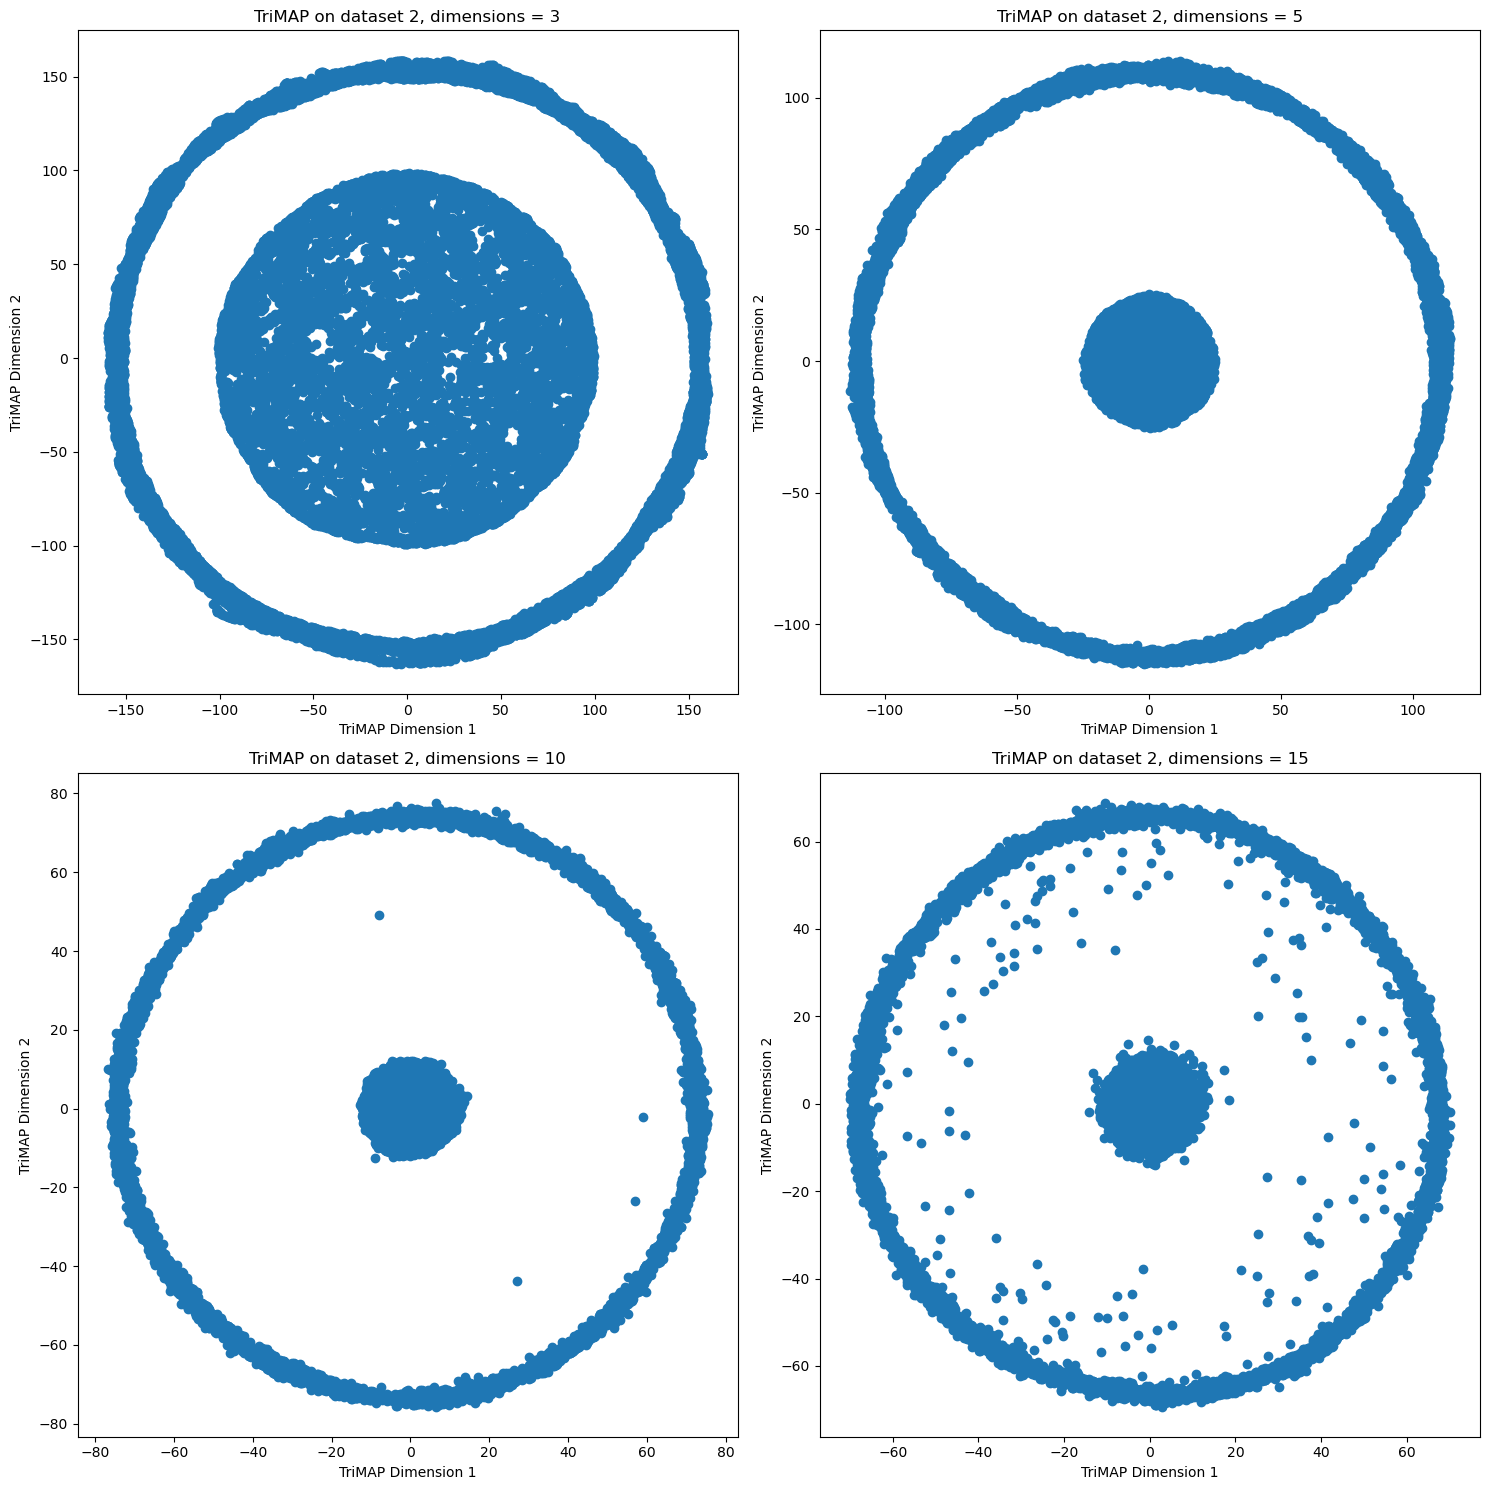

In [66]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
trimap_visualisation(dataset_3d_10000p_2, title='TriMAP on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
trimap_visualisation(dataset_5d_10000p_2, title='TriMAP on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
trimap_visualisation(dataset_10d_10000p_2, title='TriMAP on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
trimap_visualisation(dataset_15d_10000p_2, title='TriMAP on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

### PaCMAP

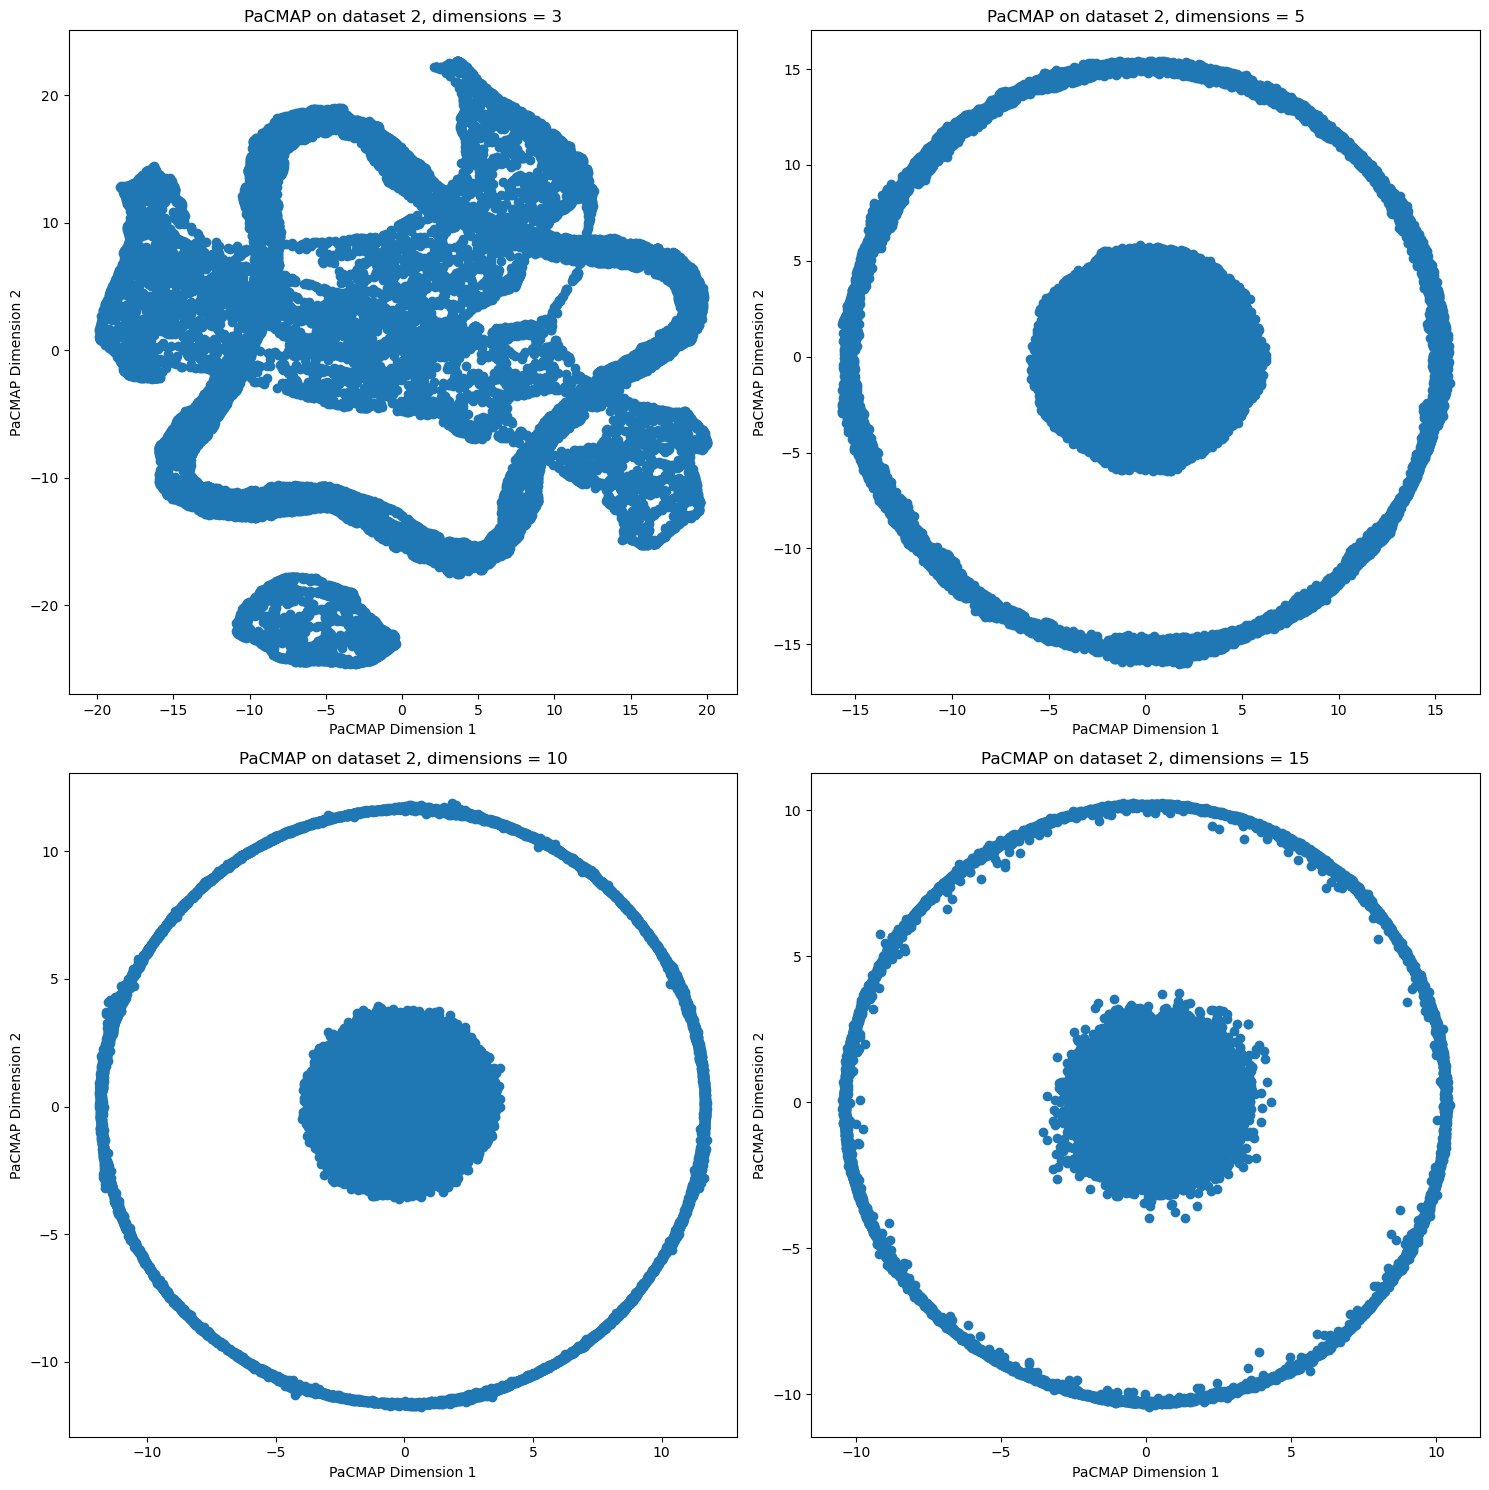

In [67]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
pacmap_visualisation(dataset_3d_10000p_2, title='PaCMAP on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
pacmap_visualisation(dataset_5d_10000p_2, title='PaCMAP on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
pacmap_visualisation(dataset_10d_10000p_2, title='PaCMAP on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
pacmap_visualisation(dataset_15d_10000p_2, title='PaCMAP on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

## Number of points in whole dataset = 300 000, 100 000 in each figure

### TSNE

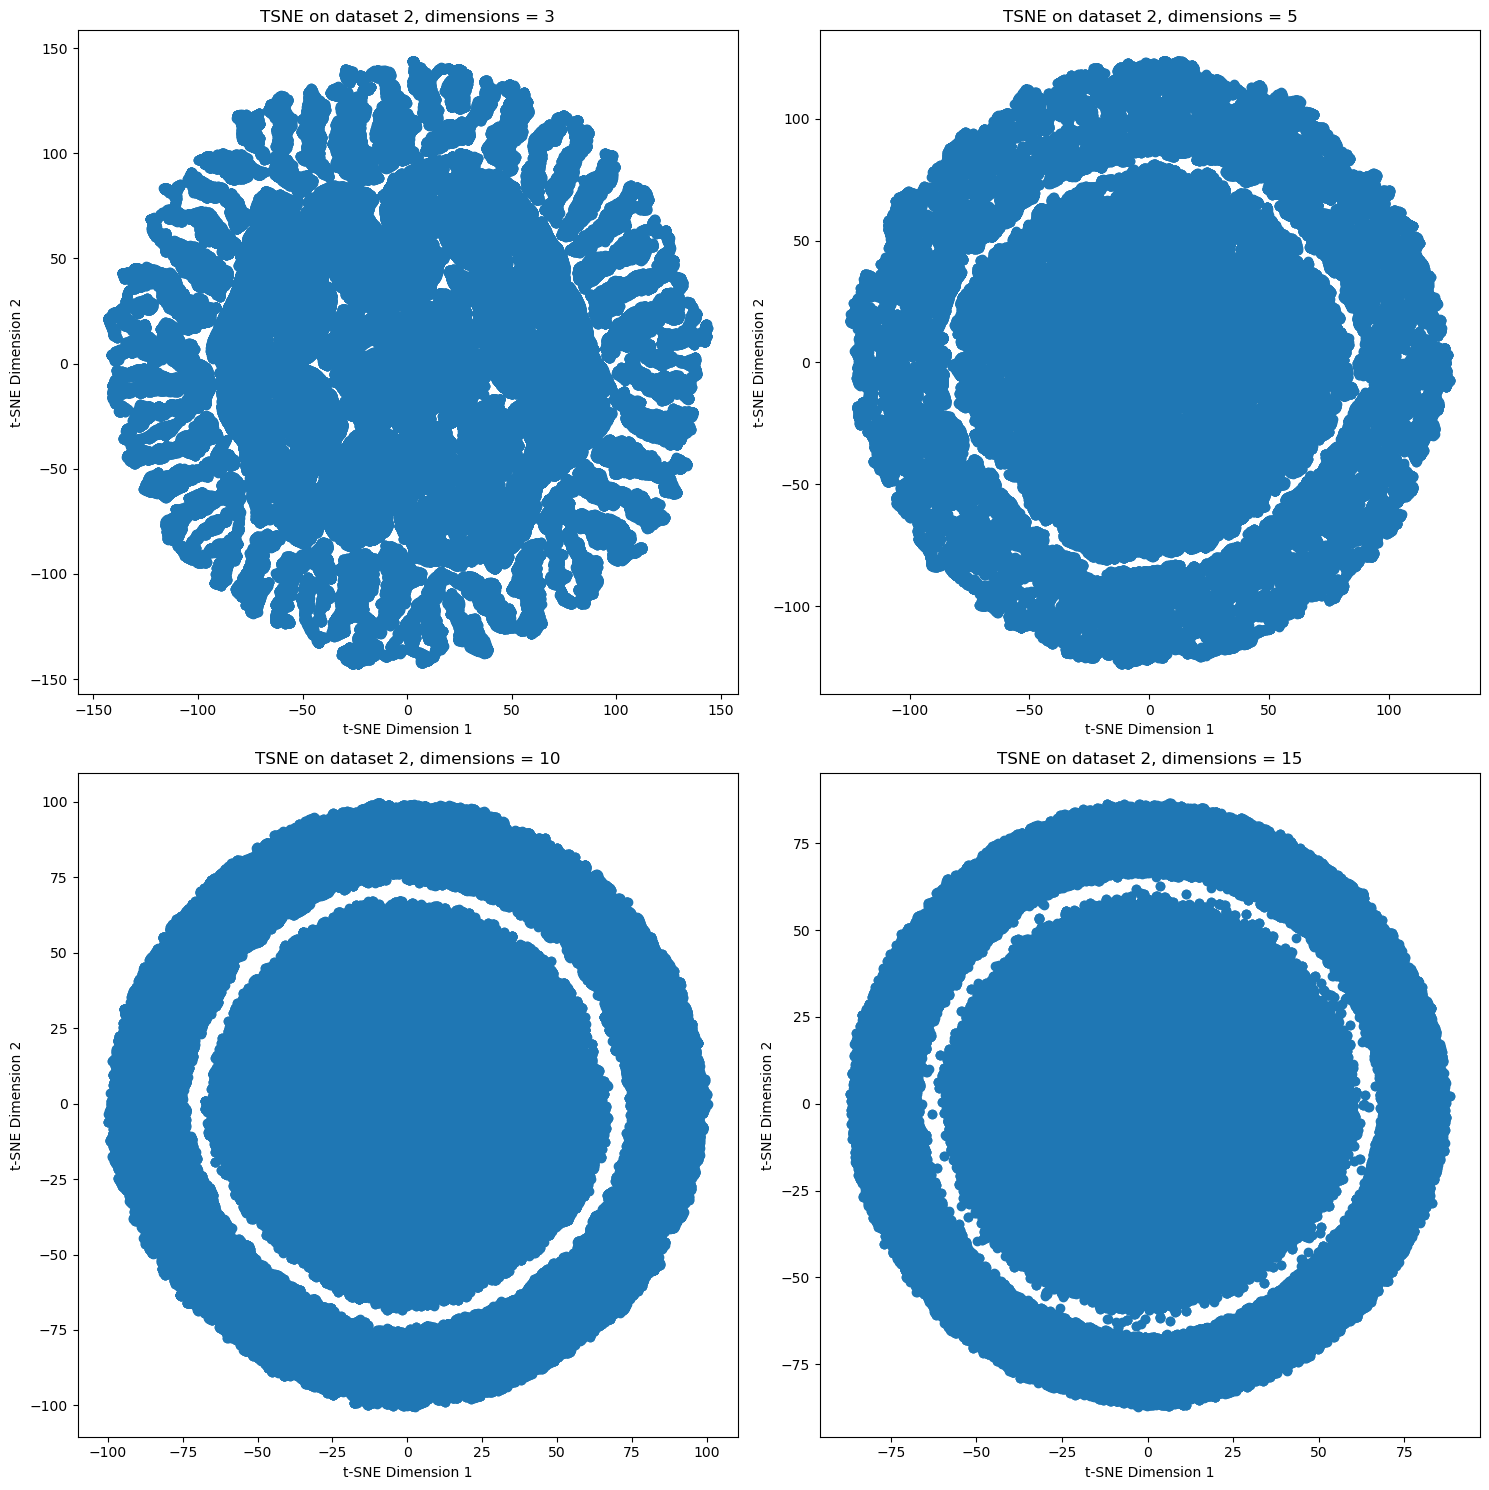

In [33]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
tsne_visualisation(dataset_3d_100000p_2, title='TSNE on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
tsne_visualisation(dataset_5d_100000p_2, title='TSNE on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
tsne_visualisation(dataset_10d_100000p_2, title='TSNE on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
tsne_visualisation(dataset_15d_100000p_2, title='TSNE on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

### UMAP

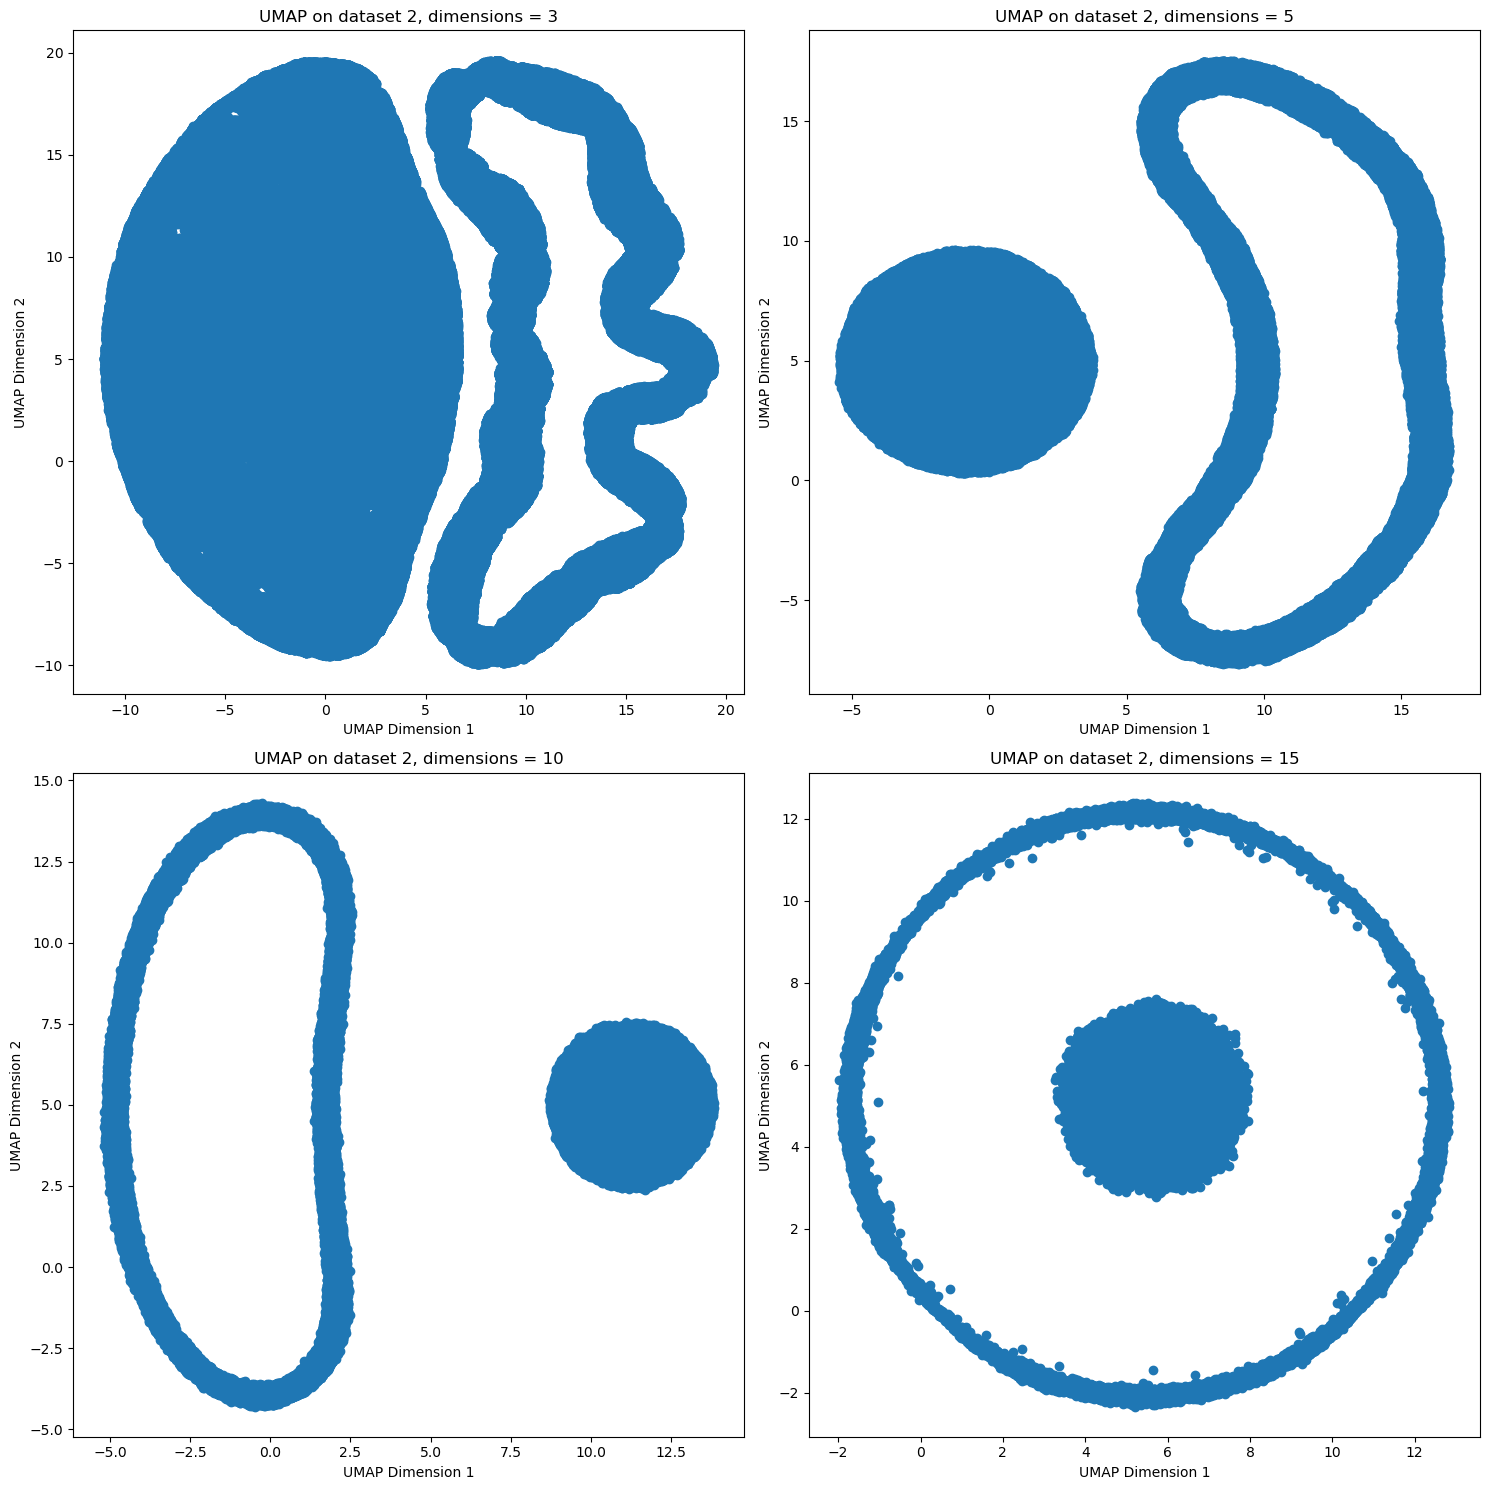

In [110]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
umap_visualisation(dataset_3d_100000p_2, title='UMAP on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
umap_visualisation(dataset_5d_100000p_2, title='UMAP on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
umap_visualisation(dataset_10d_100000p_2, title='UMAP on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
umap_visualisation(dataset_15d_100000p_2, title='UMAP on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

### TriMAP

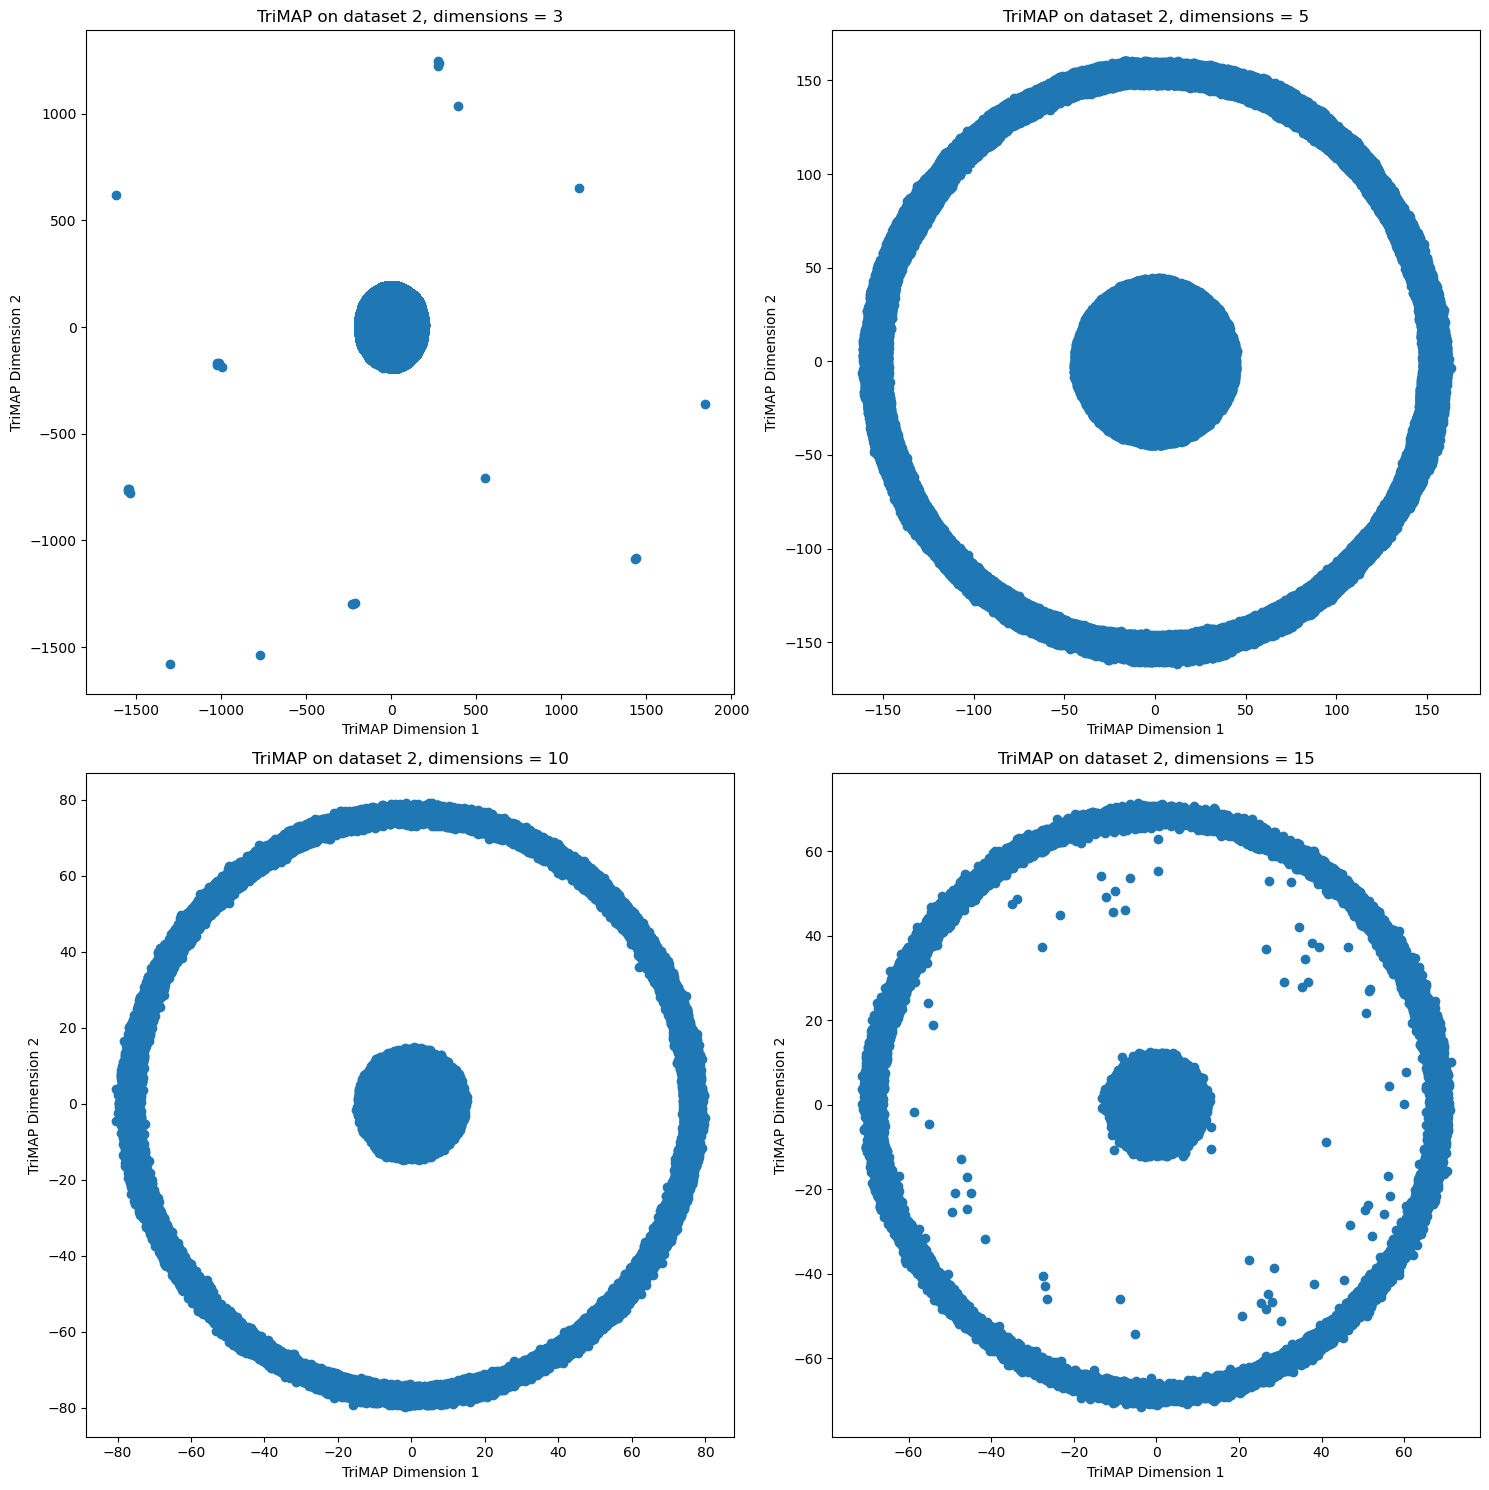

In [111]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
trimap_visualisation(dataset_3d_100000p_2, title='TriMAP on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
trimap_visualisation(dataset_5d_100000p_2, title='TriMAP on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
trimap_visualisation(dataset_10d_100000p_2, title='TriMAP on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
trimap_visualisation(dataset_15d_100000p_2, title='TriMAP on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

### PaCMAP

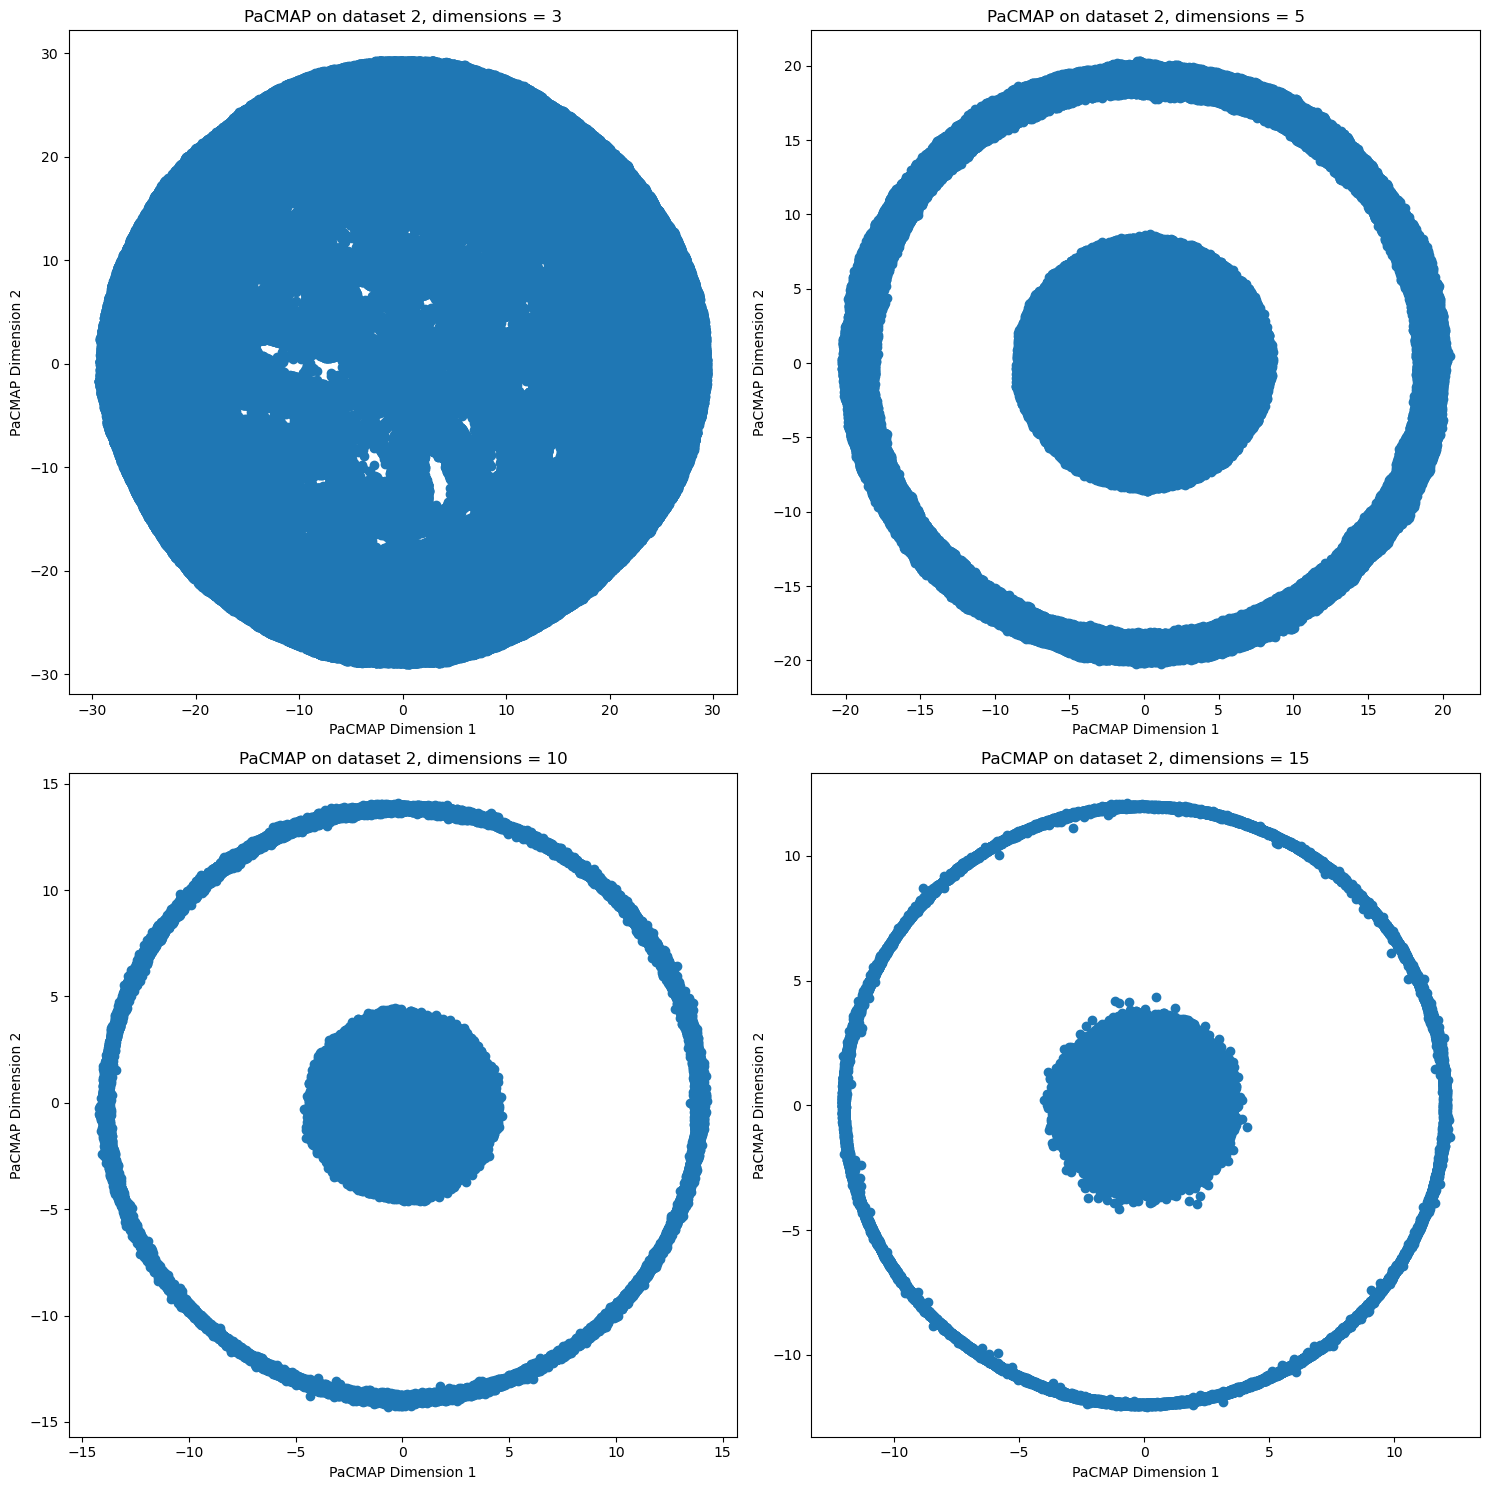

In [112]:
plt.subplots(figsize=(15, 15))
plt.subplot(2, 2, 1)
pacmap_visualisation(dataset_3d_100000p_2, title='PaCMAP on dataset 2, dimensions = 3')
plt.subplot(2, 2, 2)
pacmap_visualisation(dataset_5d_100000p_2, title='PaCMAP on dataset 2, dimensions = 5')
plt.subplot(2, 2, 3)
pacmap_visualisation(dataset_10d_100000p_2, title='PaCMAP on dataset 2, dimensions = 10')
plt.subplot(2, 2, 4)
pacmap_visualisation(dataset_15d_100000p_2, title='PaCMAP on dataset 2, dimensions = 15')

plt.tight_layout()
plt.show()

Wnioski: <br/>
+ Znowu jest tak że dla 300000 punktow dla mniejszej wymairowości radzi sobie gorzje

## TO DO
- Zasntaowic sie nad tymi odleglosciami czy sa git czy cos pozmieniac, jaki promien ma meic kula sfera, torus itp, czy to robi duza roznice
- kula i sfera daja podobne wyniki przy redukcji wymiarowosci
- Moze sproobowac kule w torusie
- napisac wnioski do kazdego 